# Phenome-environment wide sex differences in *NHANES*

Tomás González Zarzar  
12/20

In [1]:
# import libraries but skip cell
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from FigureFun import *
import clarite as cl
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

rpy2 ModuleSpec(name='rpy2', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f29bc343a10>, origin='/home/tomas/anaconda3/envs/py_clarite/lib/python3.7/site-packages/rpy2/__init__.py', submodule_search_locations=['/home/tomas/anaconda3/envs/py_clarite/lib/python3.7/site-packages/rpy2'])


In [2]:
# set paths
os.chdir('..')
mainpath = os.getcwd()
datapath = os.path.join(mainpath, 'Data')
respath  = os.path.join(mainpath, 'Results')

In [3]:
# New variables names
os.chdir(datapath)
var_newnames = pd.read_csv('Phenotype_categories.csv').set_index('var')
var_newnames = var_newnames['newvar'].to_dict()

# Variable description
os.chdir(os.path.join(datapath, 'nh_99-06'))
var_description = pd.read_csv('VarDescription.csv')\
                     .drop_duplicates()\
                     .set_index('var')

# Cleaned raw data
os.chdir(respath)
loadfiles = ['Discovery_Females', 'Discovery_Males', 'Replication_Females', 'Replication_Males']
dfs = []
for i in range(4):
    dfs.append(pd.read_csv('CleanData_' + loadfiles[i] + '.csv').set_index('ID'))

# Result data
nhanes_res = pd.read_csv('Difference_test.csv').rename(columns={'pvalue_difference':'pvalue'}).set_index(['Variable','Phenotype'])

# Classified data
nhanes_pure  = pd.read_csv('Difference_Pure.csv').set_index(['Variable','Phenotype'])
nhanes_qual  = pd.read_csv('Difference_Qualitative.csv').set_index(['Variable','Phenotype'])
nhanes_quant = pd.read_csv('Difference_Quantitative.csv').set_index(['Variable','Phenotype'])

# Convert variable descriptions to a dictionary for convenience
var_descr_dict = var_description['var_desc'].to_dict()
var_category   = var_description['category'].to_dict()

phenotype = ["LBXSCRINV","URXUCR","LBXSCR","LBXSATSI","LBXSAL","URXUMASI","URXUMA","LBXSAPSI","LBXSASSI","LBXSC3SI",
             "LBXSBU","LBXBAP","LBXCPSI","LBXCRP","LBXSCLSI","LBXSCH","LBDHDL","LBDLDL","LBXSGTSI","LBXSGB",
             "LBXGLU","LBXGH","LBXHCY","LBXSIR","LBXSLDSI","LBXMMA","LBXSOSSI","LBXSPH","LBXSKSI",	
             "LBXSNASI","LBXSTB","LBXSCA","LBXSTP","LBXSTR","LBXSUA","LBDBANO","LBXBAPCT",
             "LBDEONO","LBXEOPCT","LBXHCT","LBXHGB","LBDLYMNO","LBXMCHSI","LBXLYPCT","LBXMCVSI","LBXMPSI","LBDMONO",
             "LBXMOPCT","LBXPLTSI","LBXRBCSI","LBXRDW","LBDNENO","LBXNEPCT"] # I removed the ones that were deleted in the QC process

covariates = ["black", "mexican", "other_hispanic", "other_eth", "SES_LEVEL", "RIDAGEYR", "SDDSRVYR","BMXBMI"]

cols = list(dfs[0].columns)
ind  = list(var_description.index)
keep_vars = [ind.index(cols[x]) for x in range(len(cols)) if cols[x] in ind]
counts    = var_description.iloc[keep_vars, 34].value_counts(sort=True) #34 is the category position

## Main purpose

To identify environmental exposures that have differential effects between sexes/genders

## For example

In [4]:
# Example data
exposure_means_f = [0.5, -0.5, 0.3, 0.1]
exposure_means_m = [0.8, 0.6, 1.0, 0.7]

exposure_se_f = [0.2, 0.2, 0.08, 0.15]
exposure_se_m = [0.25, 0.2, 0.13, 0.08]

exposure_names = ['Exp. A', 'Exp. B', 'Exp. C', 'Exp. D']
dic = {'exposure': exposure_names, 'MeanF': exposure_means_f, 'MeanM':exposure_means_m, 'SEF':exposure_se_f, 'SEM':exposure_se_m}
dat = pd.DataFrame(dic)

# Annotations
annotate_text = ['No difference', 'Opposite\ndirections\n(qualitative)', 'Differences\nin effect size\n(quantitative)', 'No effect in one sex\n(pure)']

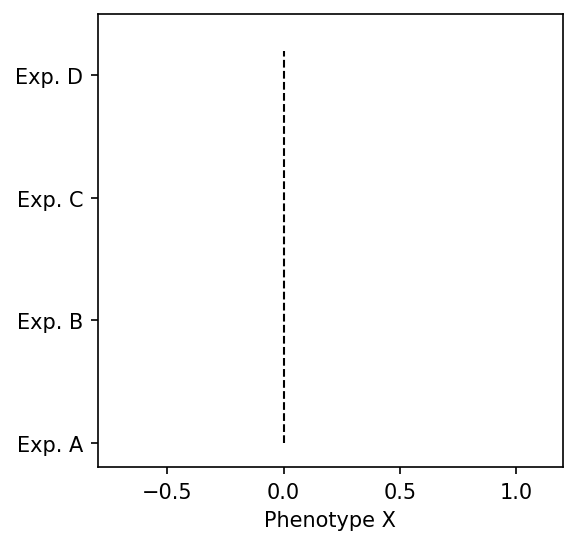

In [5]:
# Fig 1: Empty figure
fig = plt.figure(figsize=(4, 4) ,dpi=150)
plt.vlines(0, 0, 3.2, linestyle='dashed', linewidth=1, colors='black')

plt.yticks(ticks = [0,1,2,3], labels=exposure_names)
plt.xlim(-0.8,1.2)
plt.ylim(-0.2,3.5)

# Legend
#plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left', borderaxespad=-0.5)
plt.xlabel('Phenotype X')

plt.show()

In [6]:
def plot_effects(datfr):
    """
    Plot exposure effects based on dat dataframe
    """
    fig = plt.figure(figsize=(4, 4) ,dpi=150)
    plt.errorbar(datfr['MeanF'], datfr['exposure'], xerr=datfr['SEF'], fmt='.', label='Females')
    plt.errorbar(datfr['MeanM'], datfr['exposure'], xerr=datfr['SEM'], fmt='.', label='Males')
    plt.vlines(0, 0, 3.2, linestyle='dashed', linewidth=1, colors='black')

    for i in range(0, datfr.shape[0]):
        plt.annotate(annotate_text[i], xy=(1.2, i), xytext=(1.6, i),
                     arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=5),
                     annotation_clip=False)

    plt.yticks(ticks = [0,1,2,3], labels=exposure_names)
    plt.xlim(-0.8,1.2)
    plt.ylim(-0.2,3.5)

    # Legend
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left', borderaxespad=-0.5)
    plt.xlabel('Phenotype X')

    plt.show()

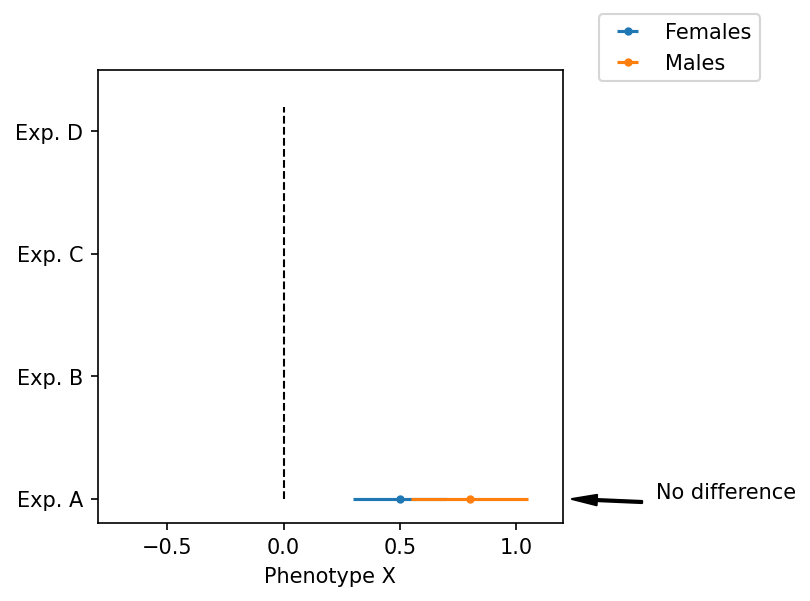

In [7]:
# Fig 2: No difference
plot_effects(dat.iloc[0:1,:])

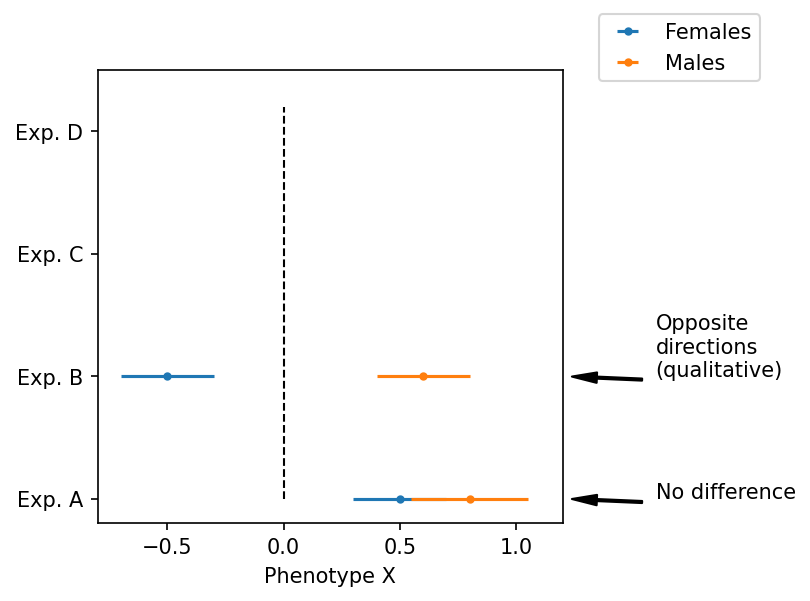

In [8]:
# Fig 3: opposite
plot_effects(dat.iloc[0:2,:])

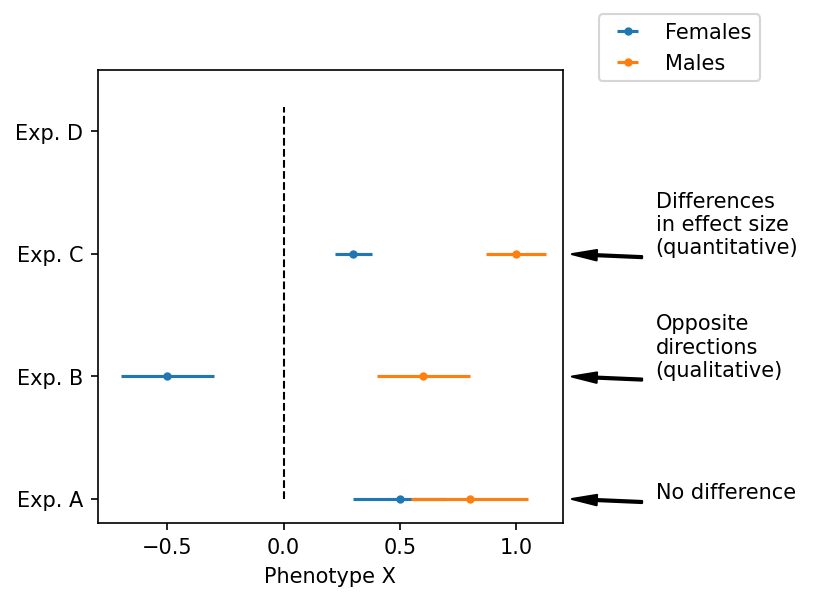

In [9]:
# Fig 3: differences
plot_effects(dat.iloc[0:3,:])

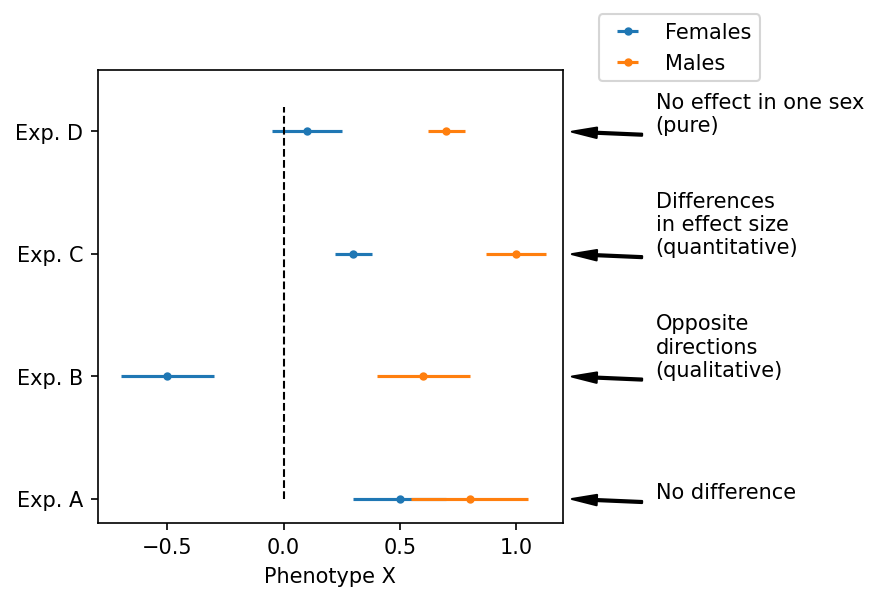

In [10]:
# Fig 4: no effect in one sex
plot_effects(dat)

## Analysis plan

- QC process using Clarite and following Nikki's plan

- Divide in Replication and Discovery, and males and females each (4 cohorts)

- Normalize the variables to keep the $\beta$ coefficients consistent

- Successive EWAS models in each cohort with a different environment-phenotype pair, while controlling for covariates

- Based on previous research, meta-analyze the different cohorts (Winkler et al. 2017). That is, we end up with TWO cohorts, males and females

## Testing for differences

- To test for sex differences (comparison of two groups) we use the *difference test*:

$$
Z_{diff} = \frac{\beta_{1pq} - \beta_{2pq}}{\sqrt{se^2_{1pq} + se^2_{2pq}}}
$$

## Finding qualitative differences

- Run the *difference test* across all exposure-phenotype tests

- Keep only those that are nominally significant ($p-value<0.05$) in both sexes and have opposite $\beta$ coefficients

## Finding pure and quantitative differences

- Filter by overall association (meta-analysis of male and female cohorts) with $\alpha = 0.05$

- From that selection, keep only those with a significant *difference test* using a Bonferroni corrected $\alpha$

- From the previous subset, classify those with $\beta$ coefficients in the same direction and nominally significant in both sexes as *quantitative*, and those nominally significant in only one sex as *pure*

## Exploratory analyses

In [4]:
nvars    = dfs[0].shape[1]
nfemales = dfs[0].shape[0] + dfs[2].shape[0]
nmales   = dfs[1].shape[0] + dfs[3].shape[0]
print("There are {0} variables, and {1} females and {2} males".format(nvars, 
                                                                      nfemales, 
                                                                      nmales))

There are 386 variables, and 9847 females and 9090 males


In [5]:
print("From the {0} variables, {1} are phenotypes, {2} are covariates, and {3} are exposures".format(nvars, 
                                                                                                     len(phenotype), 
                                                                                                     len(covariates), 
                                                                                                     nvars - len(phenotype) - len(covariates)))

From the 386 variables, 53 are phenotypes, 8 are covariates, and 325 are exposures


## Correlations between phenotypes

In [6]:
# Order variables by average between sexes
corr_pheno_total = estimate_corr(pd.concat([dfs[0][phenotype], dfs[1][phenotype],
                                            dfs[2][phenotype], dfs[3][phenotype]], axis=0))

idx_total        = cluster_corr(pd.DataFrame(corr_pheno_total), returnindex=True)
corr_pheno_total = cluster_corr(pd.DataFrame(corr_pheno_total))

In [7]:
var_names_females = [phenotype[i] for i in idx_total]

#Change to new names
for i in range(0, len(var_names_females)):
    var_names_females[i] = var_newnames[var_names_females[i]]

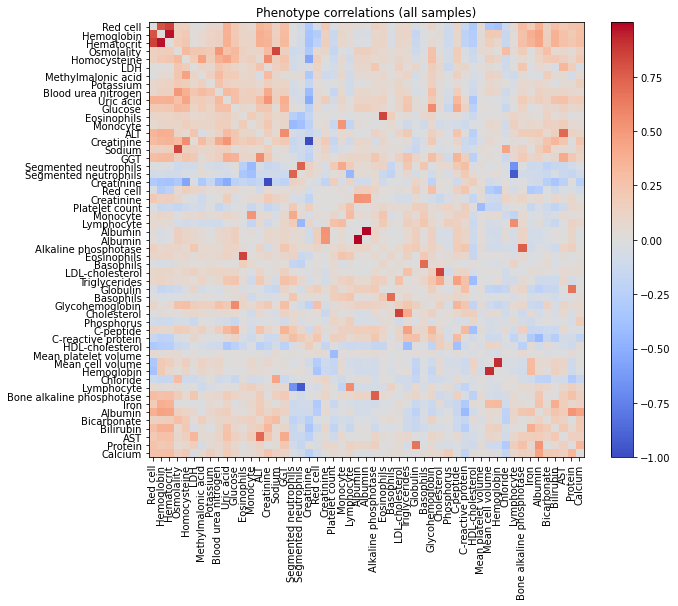

In [8]:
#Plot correlation overall
correl_plot(corr_pheno_total, figs=(10,8), title='Phenotype correlations (all samples)', ticknames=var_names_females)

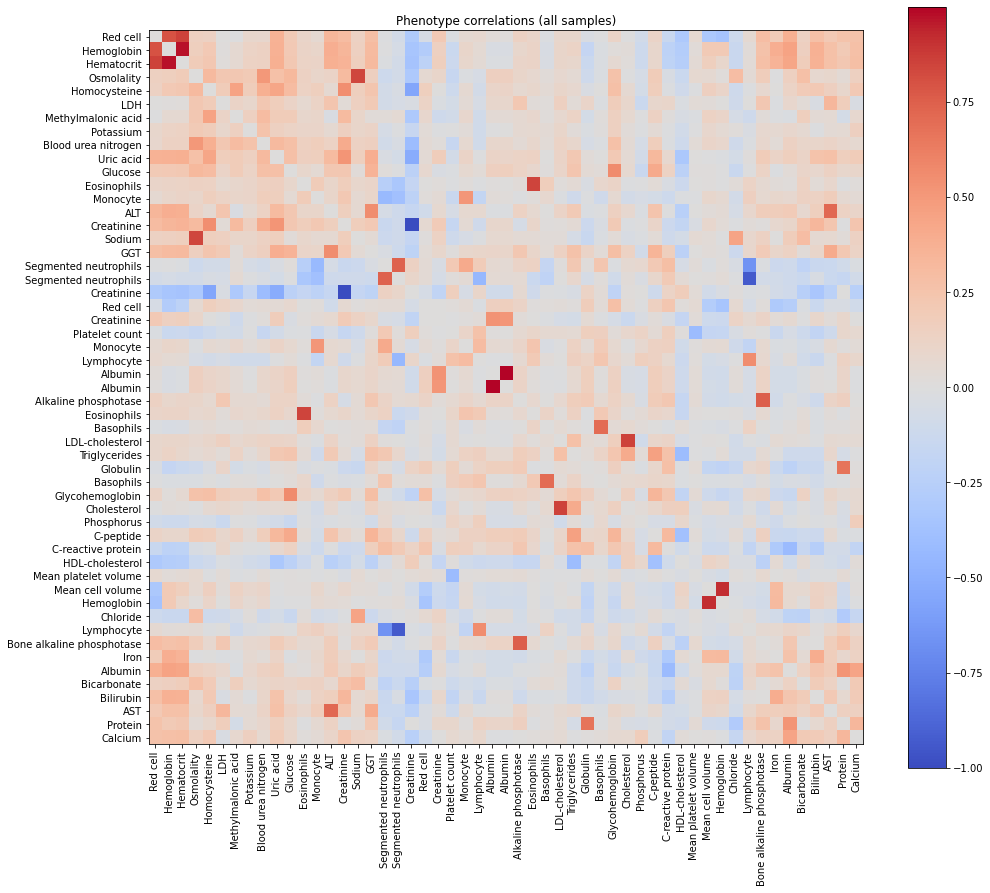

In [12]:
# Same plot to save it as pdf
fname = os.path.join(respath, 'Plots', 'Figure1.pdf')
correl_plot(corr_pheno_total, figs=(16,14), title='Phenotype correlations (all samples)', ticknames=var_names_females, filename=fname)

In [13]:
# Create correlations within sexes
corr_pheno_fem  = estimate_corr(pd.concat([dfs[0][phenotype], dfs[2][phenotype]], axis=0))
corr_pheno_male = estimate_corr(pd.concat([dfs[1][phenotype], dfs[3][phenotype]], axis=0))

## Sex differences in correlations between phenotypes

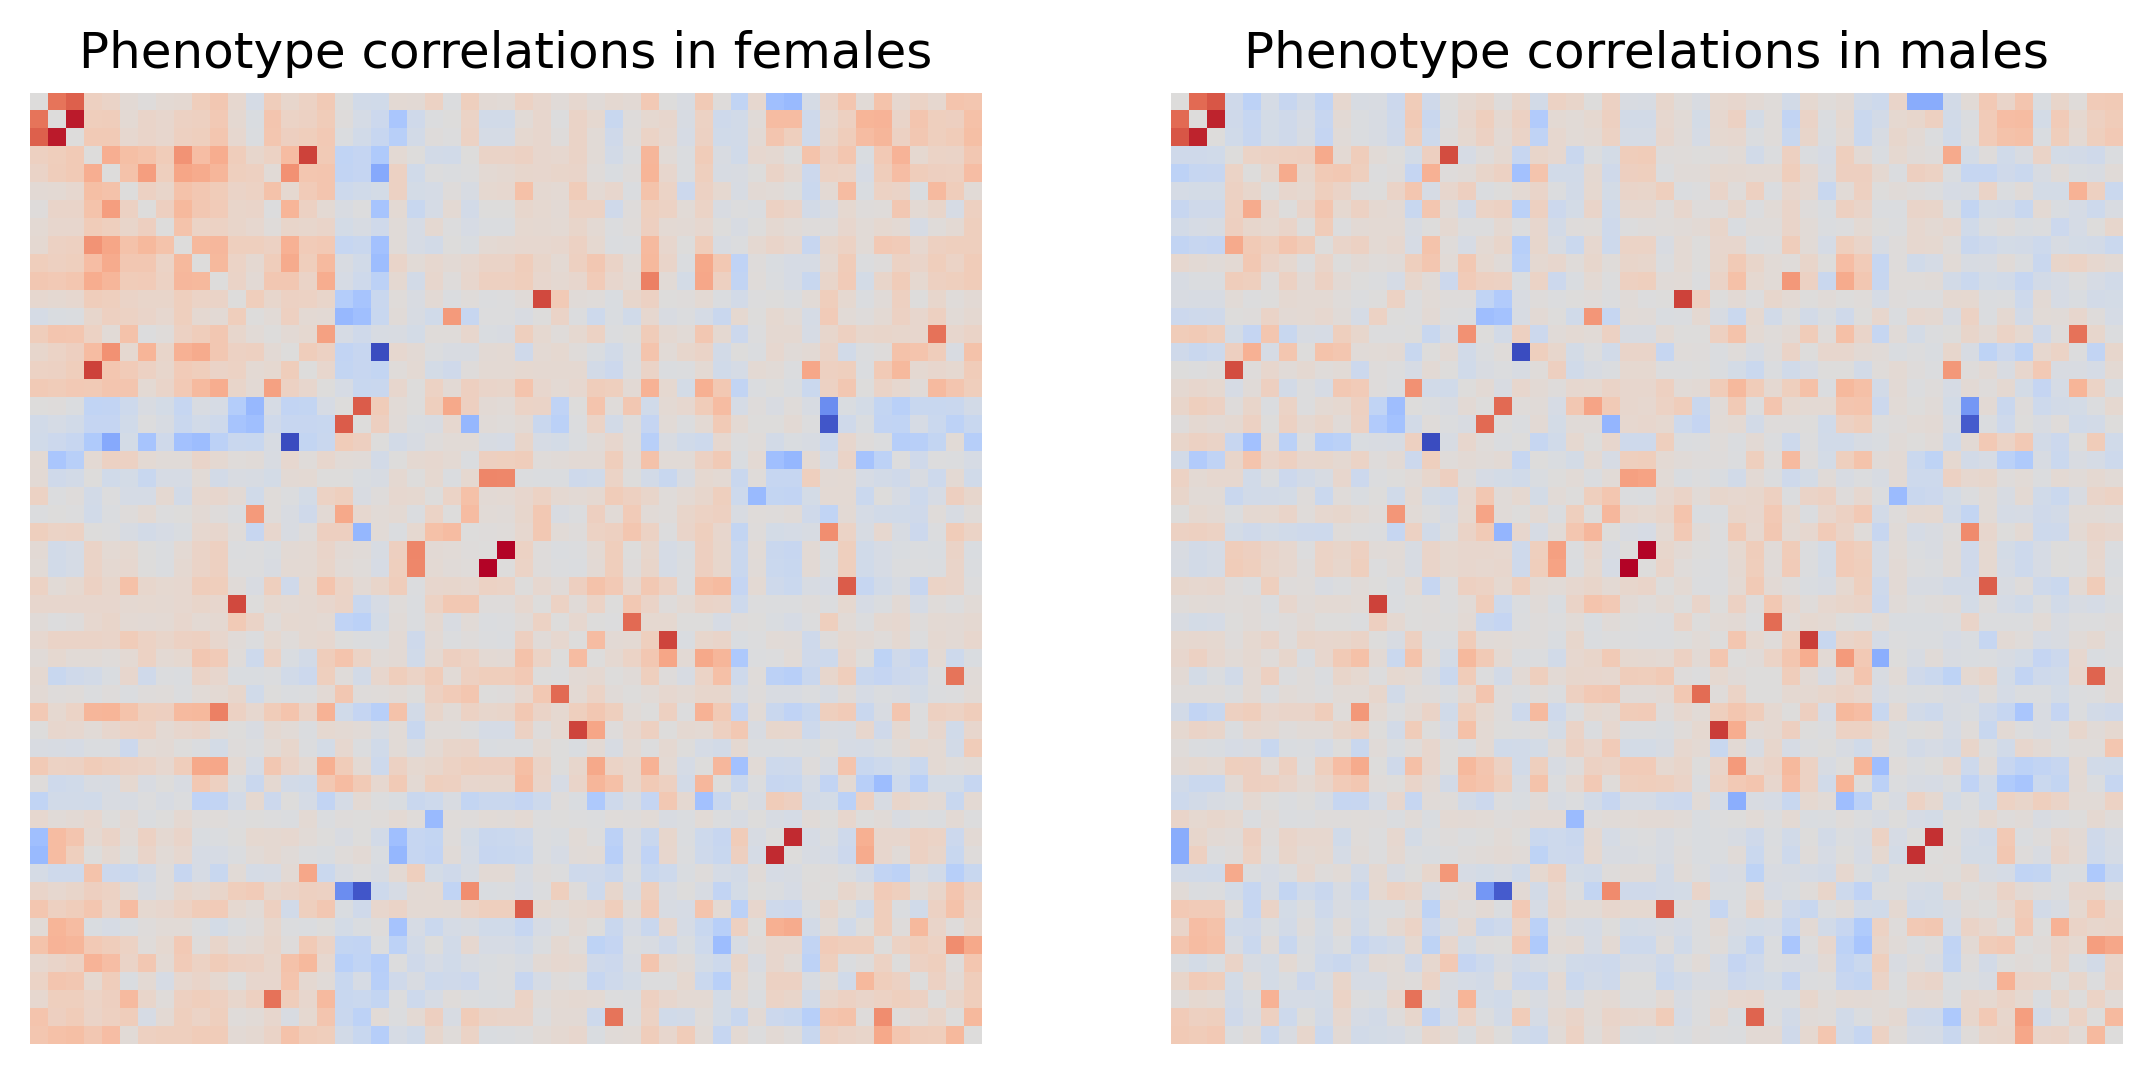

In [14]:
fig = plt.figure(figsize=(9,9), dpi=300)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
im1 =  ax1.imshow(pd.DataFrame(corr_pheno_fem).iloc[idx_total, idx_total], cmap='coolwarm')
ax1.set_title('Phenotype correlations in females')
ax1.axis('off')

im2 =  ax2.imshow(pd.DataFrame(corr_pheno_male).iloc[idx_total, idx_total], cmap='coolwarm')
ax2.set_title('Phenotype correlations in males')
ax2.axis('off')

plt.show()

In [15]:
corr_diff = abs(corr_pheno_fem - corr_pheno_male)

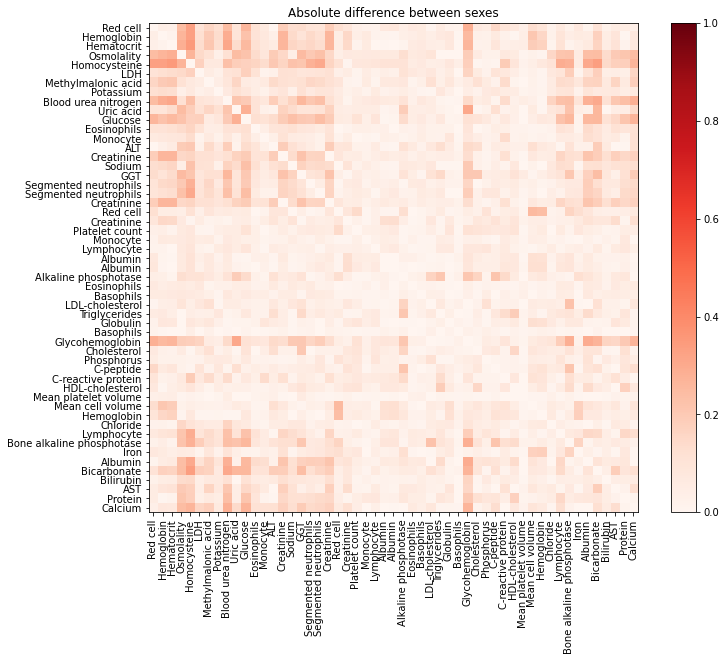

In [16]:
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(111)
im  = ax1.imshow(pd.DataFrame(corr_diff).iloc[idx_total, idx_total], cmap='Reds',
                 vmin=0, vmax=1)
ax1.set_title('Absolute difference between sexes')

# Labels
plt.xticks(range(len(var_names_females)), var_names_females, rotation=90);
plt.yticks(range(len(var_names_females)), var_names_females);

#Colorbar
fig.colorbar(im)
plt.show()

## Correlation between all variables

In [17]:
# Order variables based on categories
ordered_vars = list(var_description.iloc[keep_vars, 34].sort_values().index)
ispheno      = pd.Series(ordered_vars).isin(phenotype)
corr_matrix_females = estimate_corr(pd.concat([dfs[0][ordered_vars], dfs[2][ordered_vars]], axis=0))
corr_matrix_males   = estimate_corr(pd.concat([dfs[1][ordered_vars], dfs[3][ordered_vars]], axis=0))
corr_matrix_diff    = abs(corr_matrix_females - corr_matrix_males)

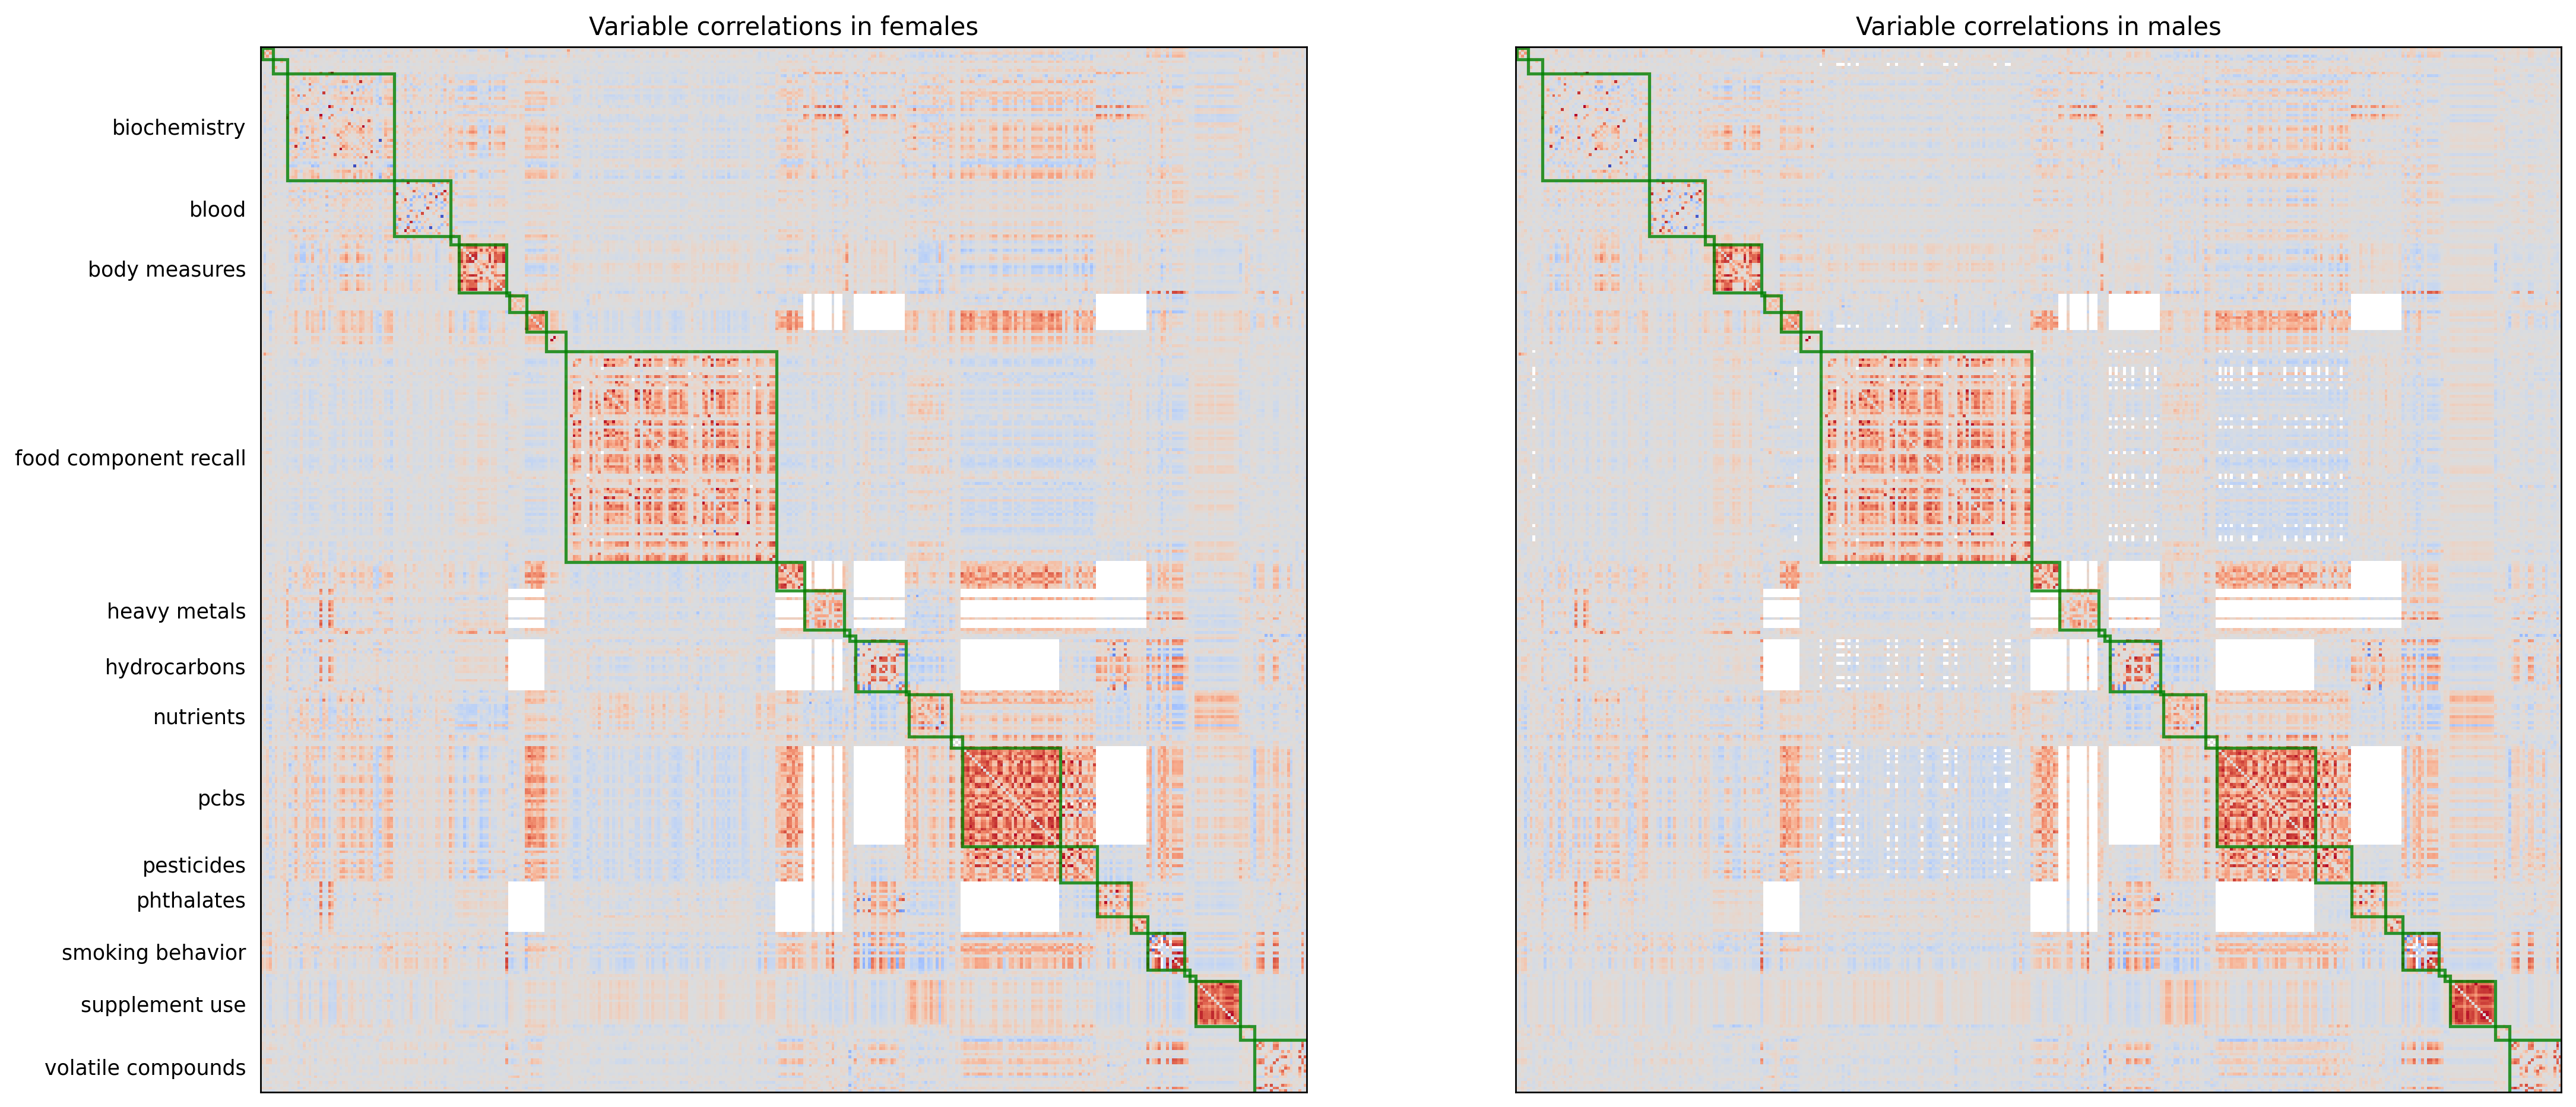

In [18]:
fig = plt.figure(figsize=(20,20), dpi=250)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
im1 = ax1.imshow(corr_matrix_females, cmap='coolwarm')
im2 = ax2.imshow(corr_matrix_males, cmap='coolwarm')
start = 0
for i,l in enumerate(counts.sort_index()):
    end = l
    ax1.add_patch(patches.Rectangle((start, start), end, end, alpha=0.8, fill=False, facecolor="green", edgecolor="green", linewidth=1.5, linestyle='solid'))
    ax2.add_patch(patches.Rectangle((start, start), end, end, alpha=0.8, fill=False, facecolor="green", edgecolor="green", linewidth=1.5, linestyle='solid'))
    start = start + end

titles = ['Variable correlations in females', 'Variable correlations in males']
l = 0
for i in [ax1,ax2]:
    i.set_title(titles[l])
    i.set(xticklabels=[])
    i.set(yticklabels=[])
    i.tick_params(axis = 'both', bottom=False, left=False)
    l = l + 1
    
# Annotate the graph
start  = 0
tick   = []
labels = []
for i,l in enumerate(counts.sort_index()):
    end = l
    if l > 10:
        labels.append(counts.sort_index().index[i])
        tick.append(start + (end/2))
    start = start + end

ax1.set_yticks(tick)
ax1.set_yticklabels(labels)
    
plt.show()

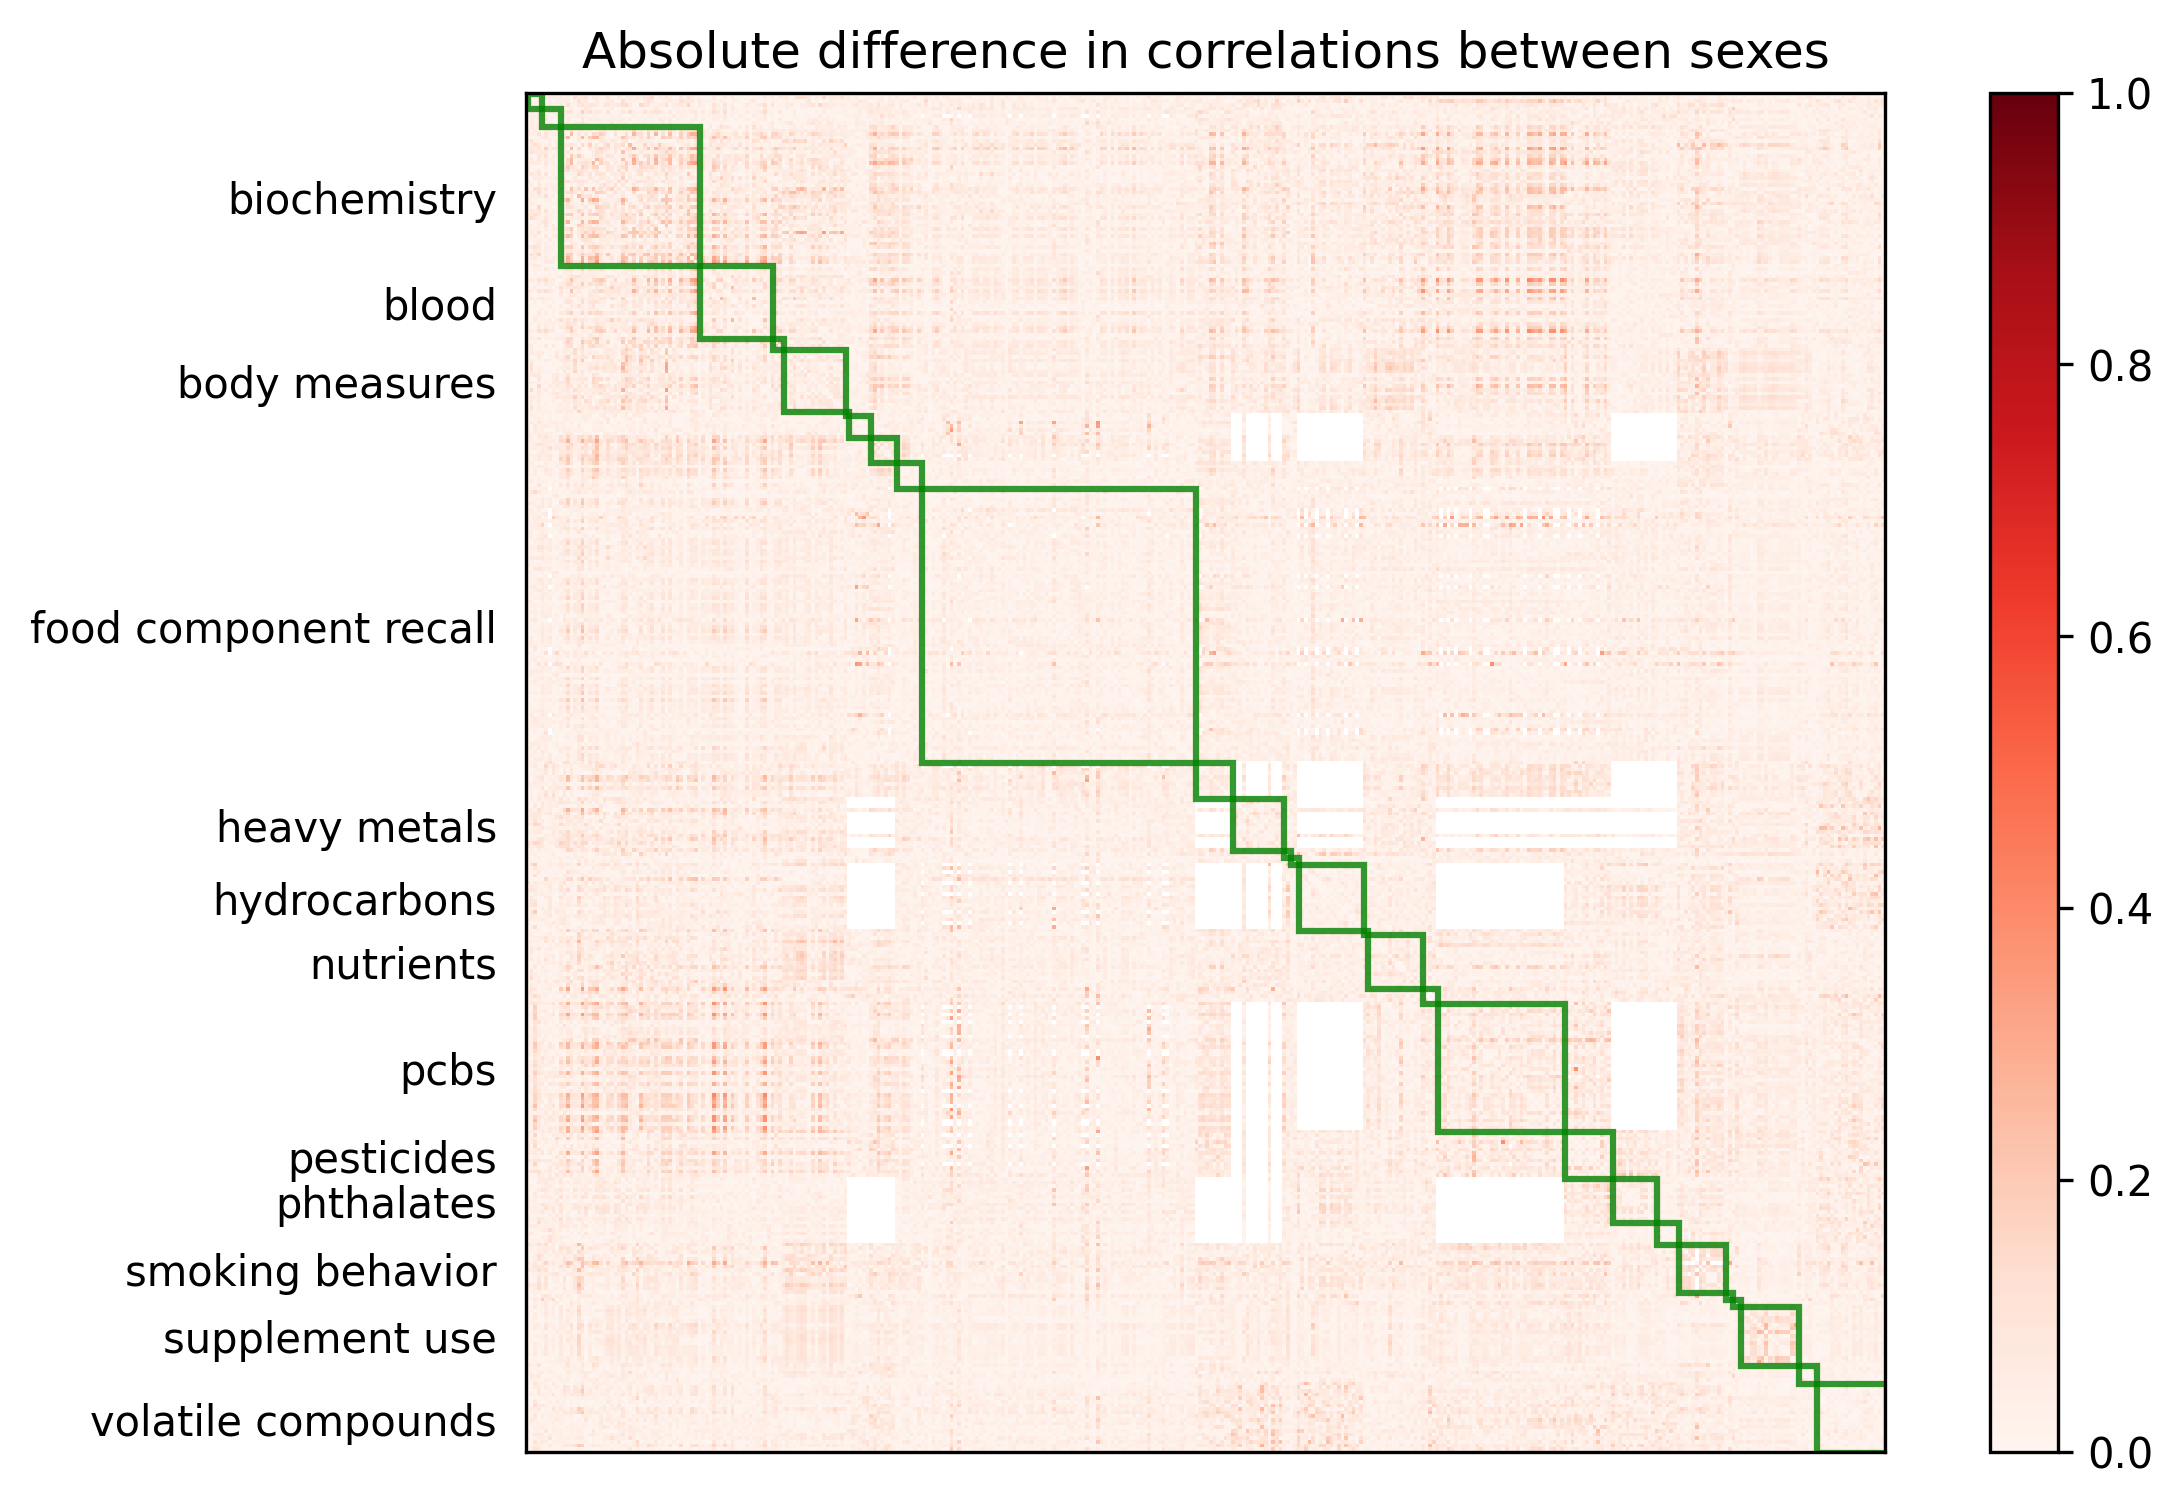

In [19]:
fig = plt.figure(figsize=(9,6), dpi=300)
ax1 = fig.add_subplot(111)
im1 = ax1.imshow(corr_matrix_diff, cmap='Reds',
                 vmin=0,vmax=1)
start = 0
for i,l in enumerate(counts.sort_index()):
    end = l
    ax1.add_patch(patches.Rectangle((start, start), end, end, alpha=0.8, fill=False, facecolor="green", edgecolor="green", linewidth=1.5, linestyle='solid'))
    start = start + end

ax1.set_title('Absolute difference in correlations between sexes')
ax1.set(xticklabels=[])
ax1.set(yticklabels=[])
ax1.tick_params(axis = 'both', bottom=False, left=False)
    
# Annotate the graph
start  = 0
tick   = []
labels = []
for i,l in enumerate(counts.sort_index()):
    end = l
    if l > 10:
        labels.append(counts.sort_index().index[i])
        tick.append(start + (end/2))
    start = start + end

ax1.set_yticks(tick)
ax1.set_yticklabels(labels)
fig.colorbar(im1)
    
plt.show()

## Preliminary results

In [20]:
# Remove NaN pvalues
nhanes_res = nhanes_res.dropna(subset=['pvalue'])
pt = 0.05/len(nhanes_res)

# Add a small value to the pvalues that are virtually zeros
nhanes_res.iloc[0,[38,39,41,42]] = 3.0e-232

In [21]:
n = len(nhanes_res)
nbonf = sum(nhanes_res['pvalue_bonferroni'] < 0.05)
nfdr  = sum(nhanes_res['pvalue_fdr'] < 0.05)
print("After the analysis, there are {0} total tests\n".format(n) )

After the analysis, there are 12132 total tests



In [22]:
n_pure  = len(nhanes_pure)
n_quant = len(nhanes_quant)
n_qual  = len(nhanes_qual)
n_total = n_pure + n_qual + n_quant
print("There are {0} significant results, of which {1} are pure, {2} quantitative, and {3} qualitative".format(n_total, n_pure, n_quant, n_qual))

There are 155 significant results, of which 37 are pure, 35 quantitative, and 83 qualitative


ValueError: Axis limits cannot be NaN or Inf

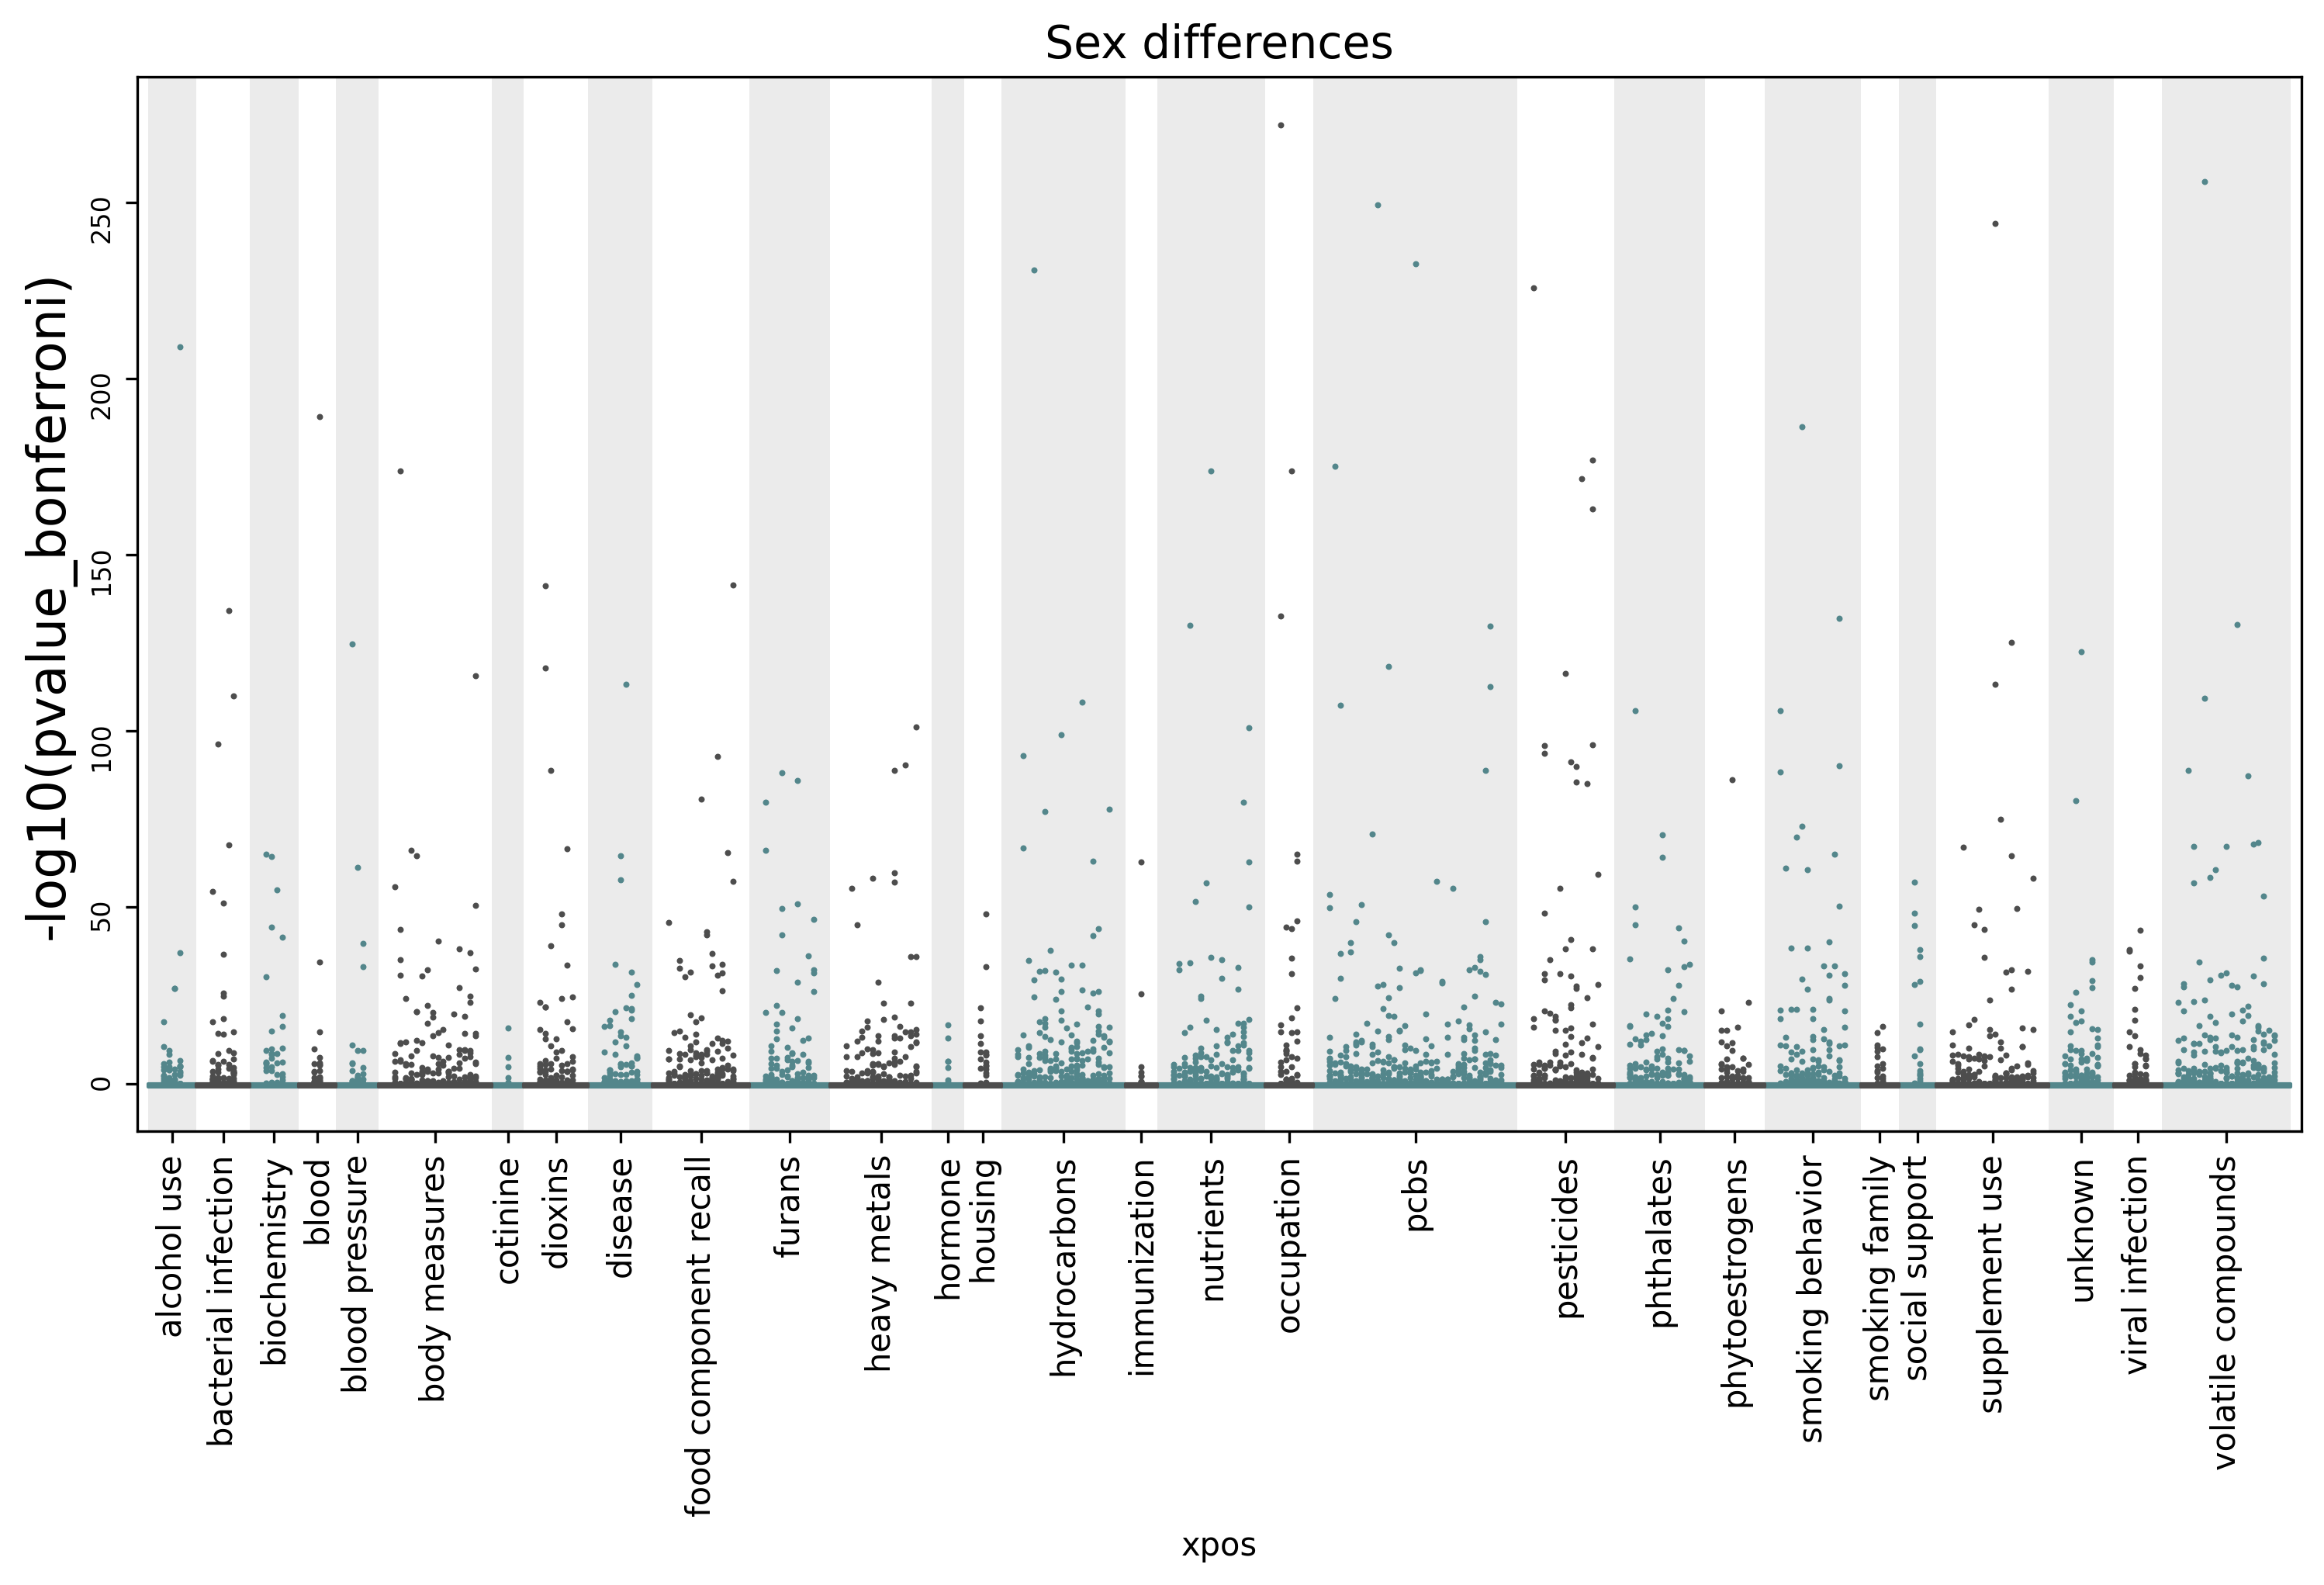

In [23]:
fig = plt.figure(figsize=(12,6), dpi=300)
#plt.annotate('Vitamin C', xy=(0.2, 0.2), xytext=(0.5, 0.2),
#             arrowprops=dict(facecolor='black', shrink=0.1, width=1, headwidth=5),
#             annotation_clip=False)

cl.plot.manhattan_bonferroni({'Sex differences': nhanes_res}, num_labeled=0, categories=var_category, 
                             title="Weighted EWAS Sex Difference Results", figure=fig)

In [24]:
# Change phenotype names in nhanes results
nhanes_res.rename(index=var_newnames, inplace=True)
nhanes_pure.rename(index=var_newnames, inplace=True)
nhanes_qual.rename(index=var_newnames, inplace=True)
nhanes_quant.rename(index=var_newnames, inplace=True)

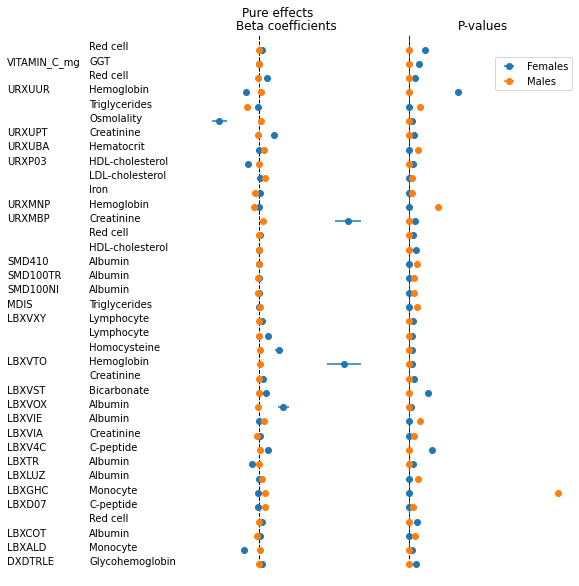

In [25]:
plot_effect_sizes(nhanes_pure, ci_names=['SE_f', 'SE_m'], figs=(10,10), title='Pure effects')

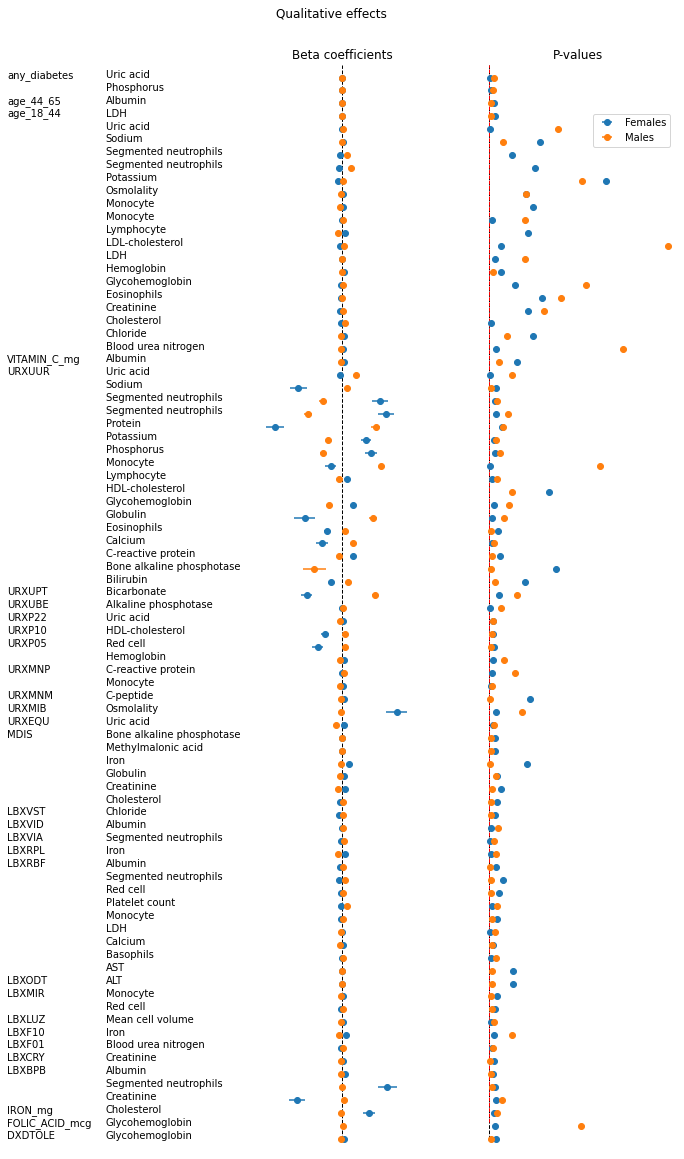

In [26]:
plot_effect_sizes(nhanes_qual, ci_names=['SE_f', 'SE_m'], figs=(12,20), title='Qualitative effects', x_limits=(-5,5))

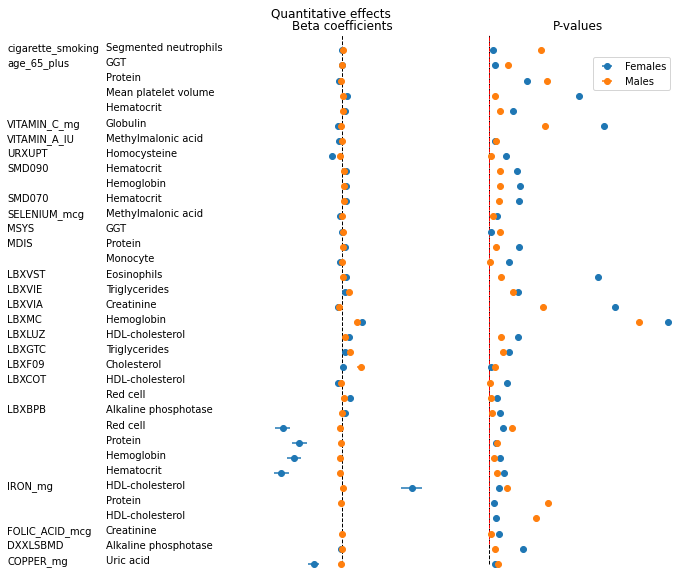

In [27]:
plot_effect_sizes(nhanes_quant, ci_names=['SE_f', 'SE_m'], figs=(12,10), title='Quantitative effects', x_limits=(-5,5))

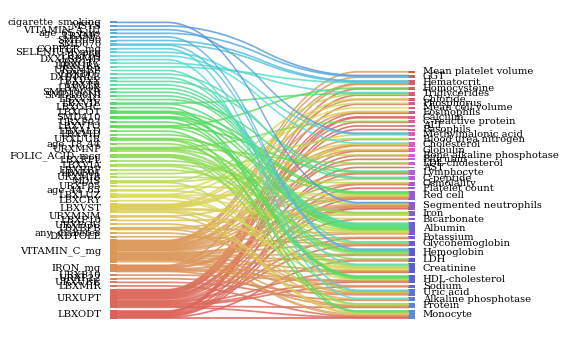

In [28]:
from pySankey import sankey

i = pd.concat([pd.Series(nhanes_qual.index.get_level_values('Variable')), pd.Series(nhanes_qual.index.get_level_values('Phenotype')) ], axis=1)
f = pd.concat([pd.Series(nhanes_pure.index.get_level_values('Variable')), pd.Series(nhanes_pure.index.get_level_values('Phenotype')) ], axis=1)
g = pd.concat([pd.Series(nhanes_quant.index.get_level_values('Variable')), pd.Series(nhanes_quant.index.get_level_values('Phenotype')) ], axis=1)

vars_all = pd.concat([i,f,g], axis=0)

sankey.sankey(vars_all['Variable'], vars_all['Phenotype'], aspect=2, fontsize=10)

In [103]:
def plot_betas(dat, exposure, vline_limits=[0, 10], title='', figs=(8,8)):
    '''
    Plot betas coefficients between males and females, defined by a particular exposure
    '''
    fig = plt.figure(figsize=figs, dpi=300)
    plt.errorbar(x = dat.loc[exposure, 'Beta_f'], 
                 y = dat.loc[exposure].index, 
                 xerr = dat.loc[exposure, 'SE_f'],
                 fmt='.', label='Females')
    
    plt.errorbar(x = dat.loc[exposure, 'Beta_m'], 
                 y = dat.loc[exposure].index, 
                 xerr = dat.loc[exposure, 'SE_m'], 
                 fmt='.', label='Males')
    
    plt.vlines(0, vline_limits[0], vline_limits[1], linestyle='dashed', linewidth=1, colors='black')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=-0.5)
    
    plt.title(title)
    plt.show()
    

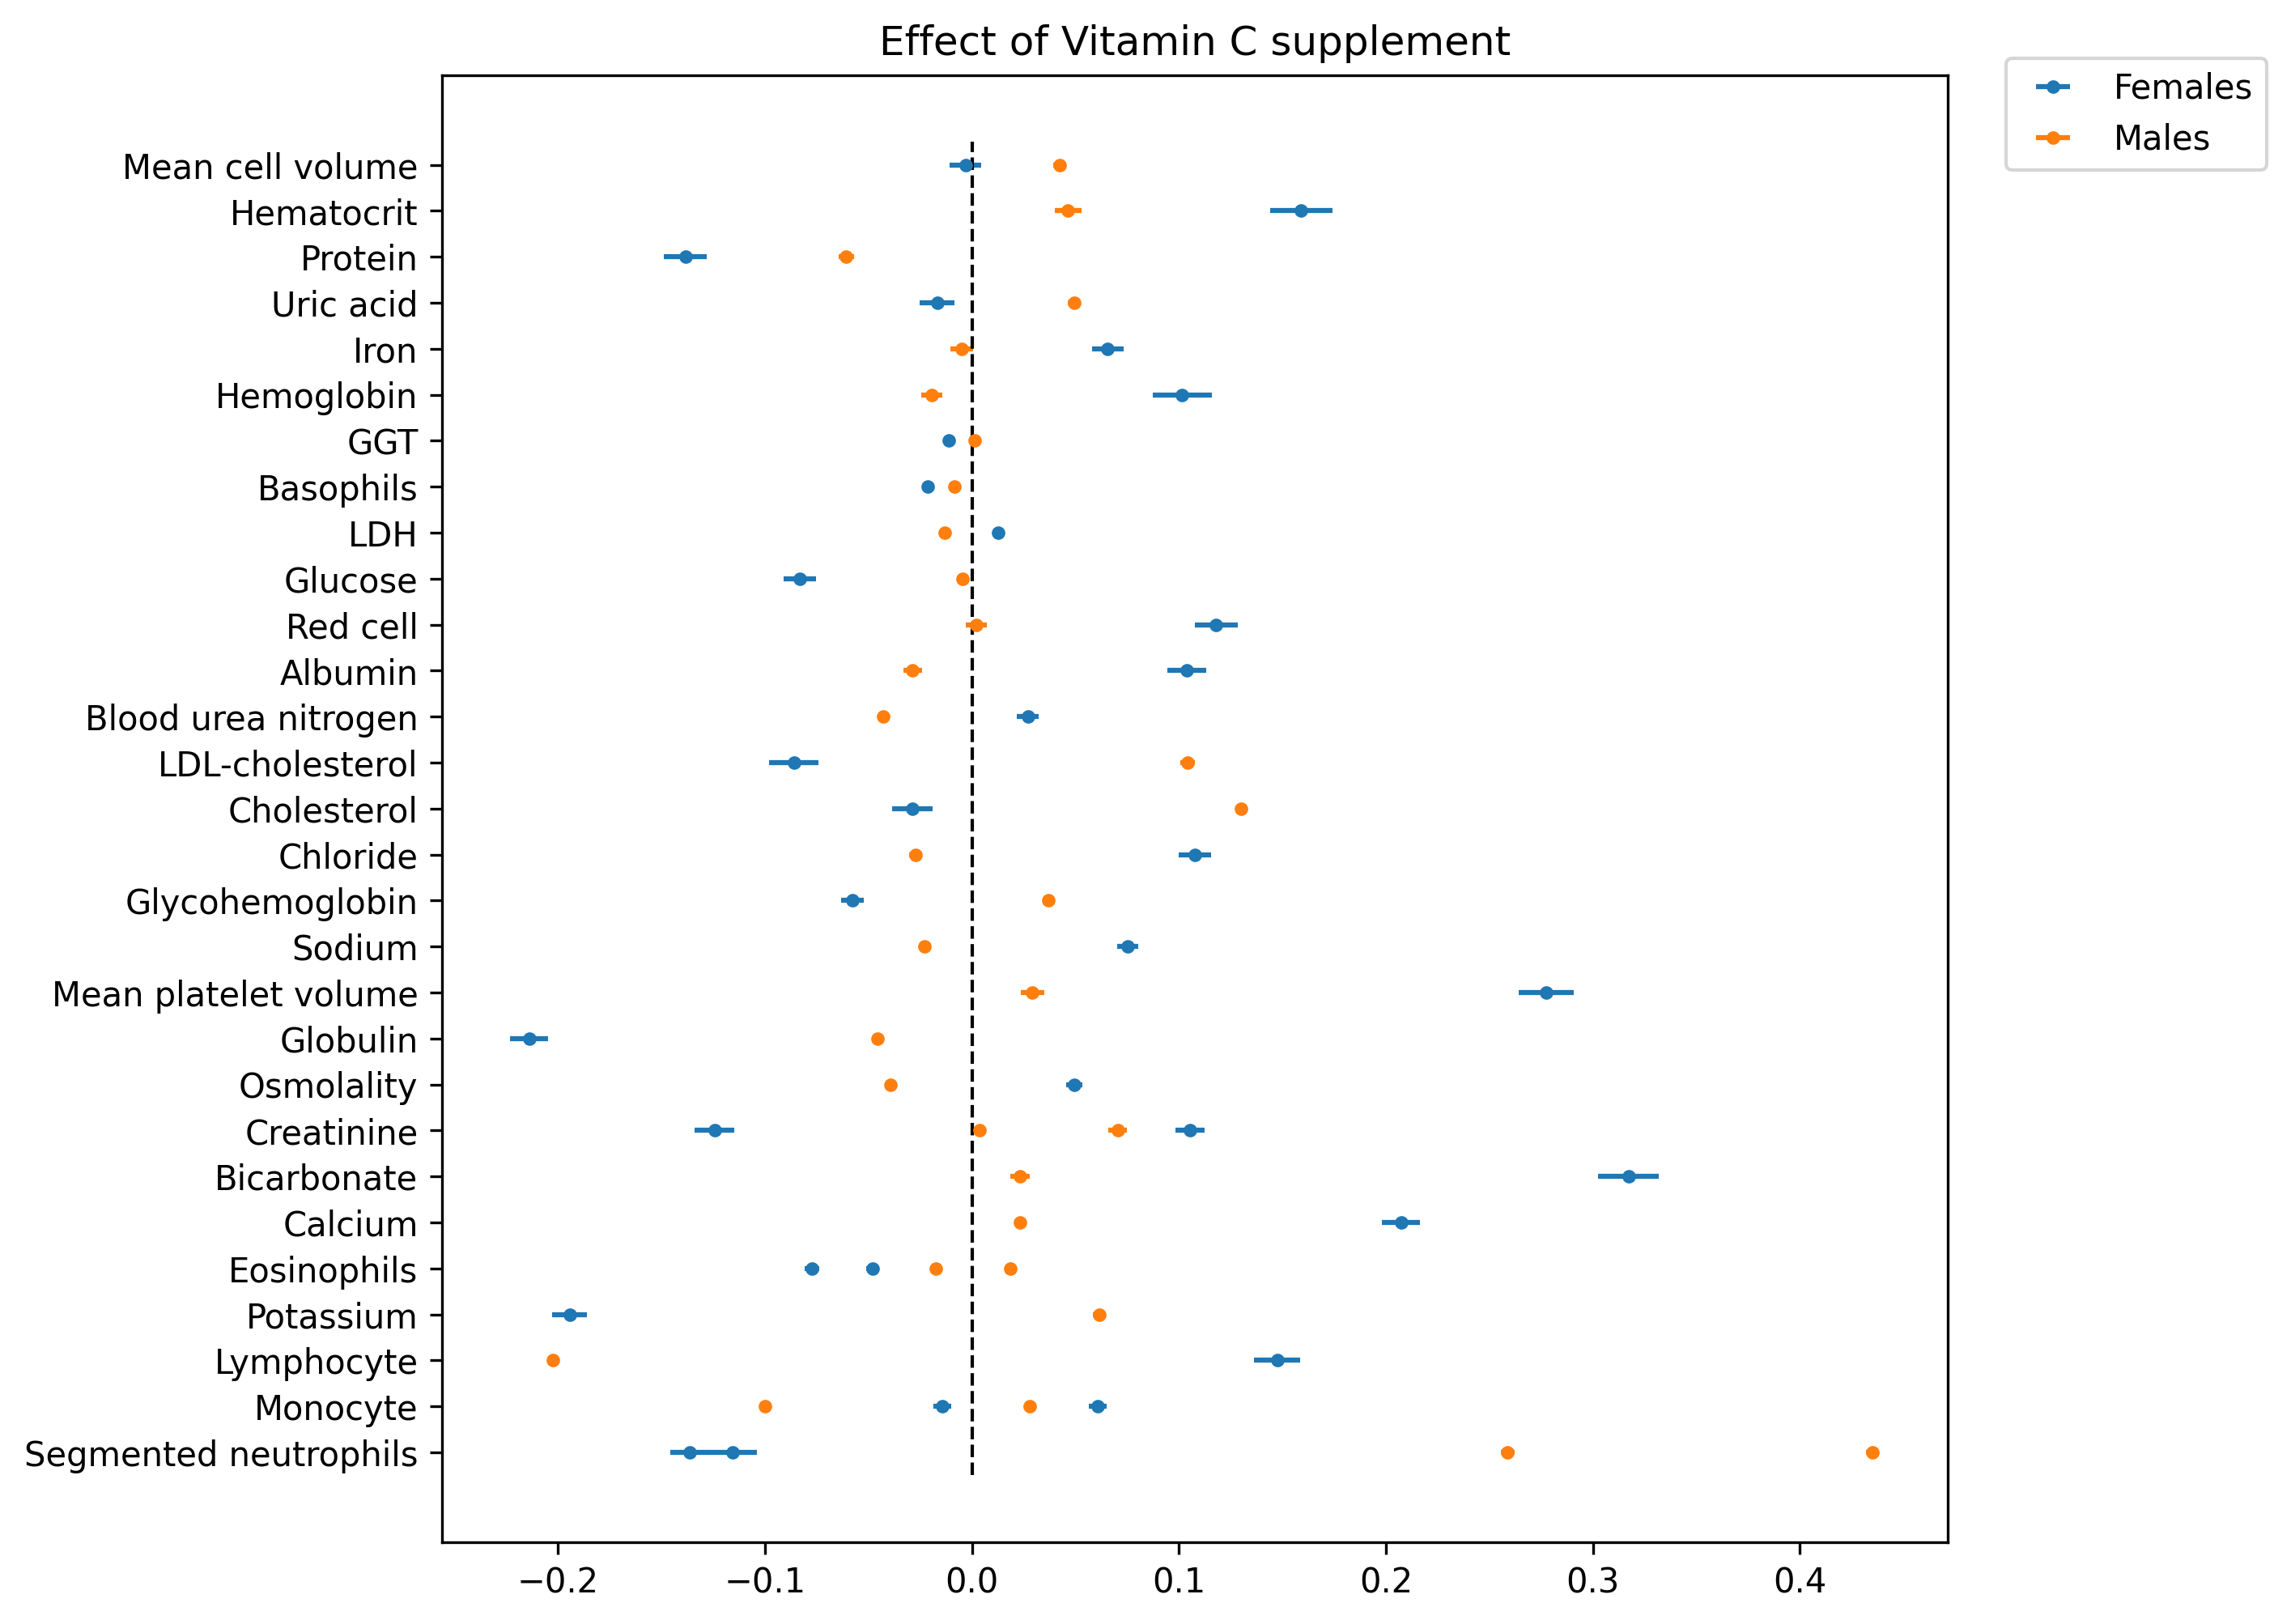

In [104]:
sig = nhanes_res['pvalue_bonferroni'] < 0.05

plot_betas(nhanes_res[sig], 'VITAMIN_C_mg', [-0.5,28.5], 'Effect of Vitamin C supplement')

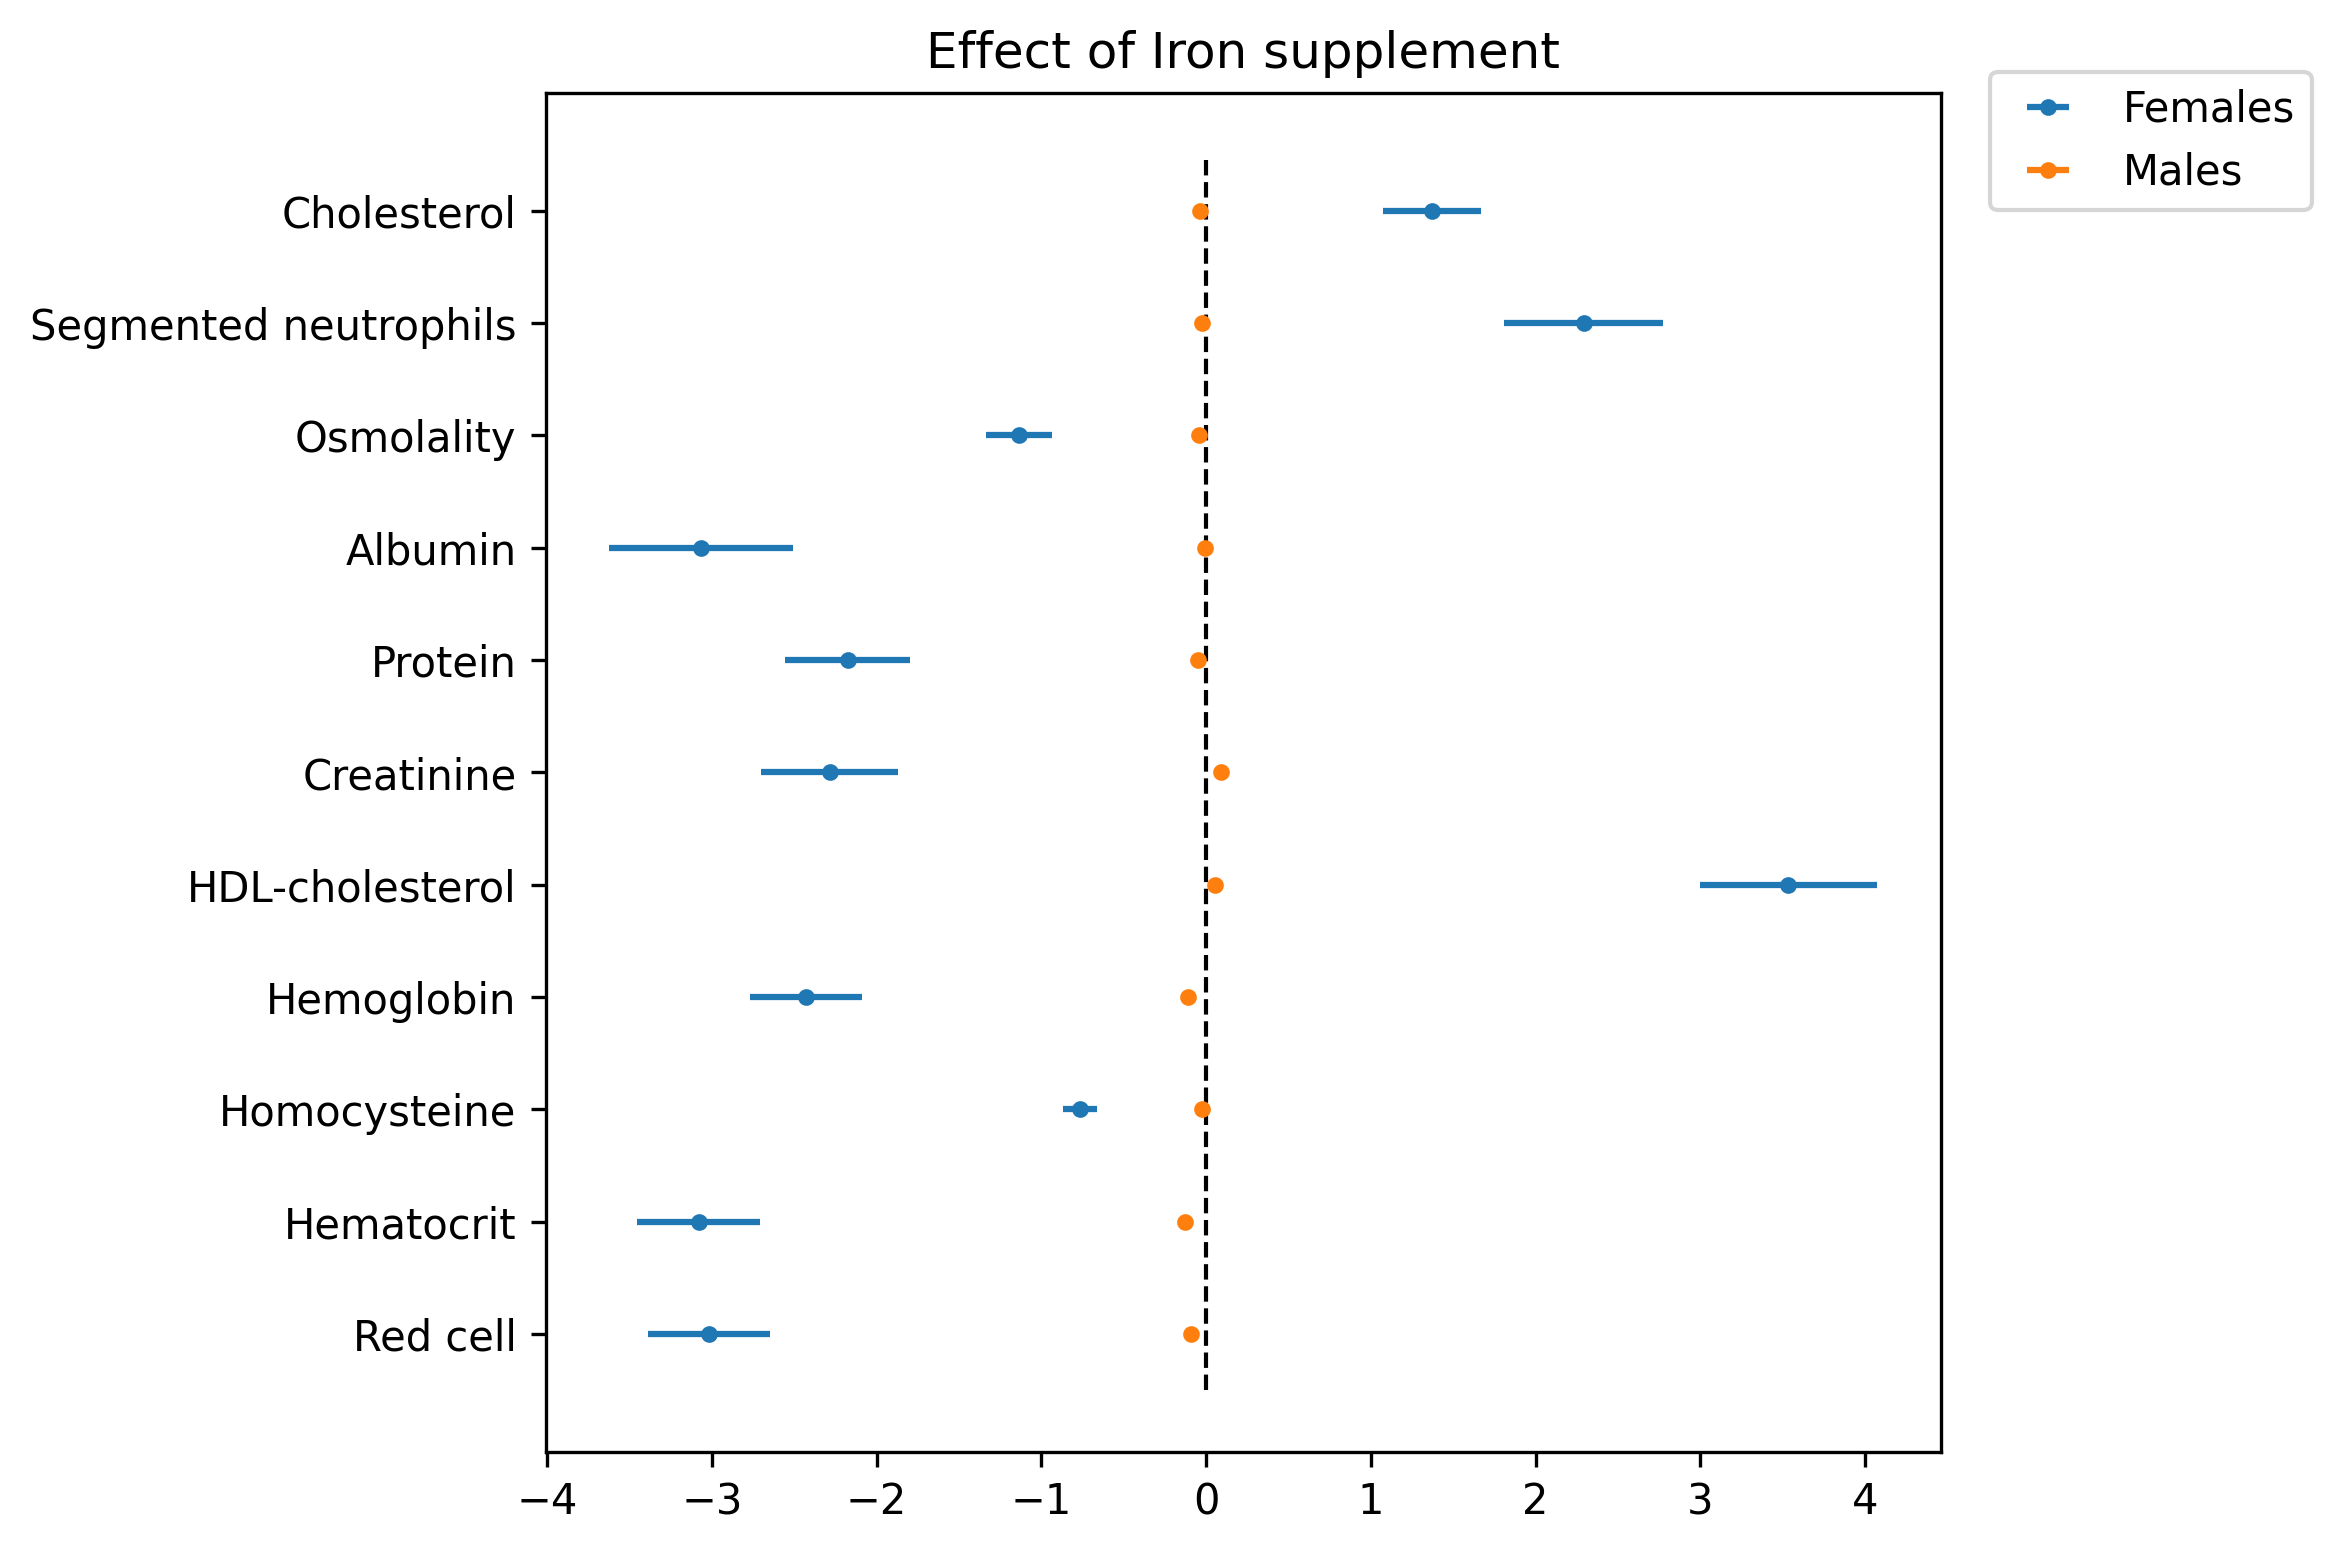

In [105]:
plot_betas(nhanes_res[sig], 'IRON_mg', [-0.5,10.5], 'Effect of Iron supplement', figs=(6,6))

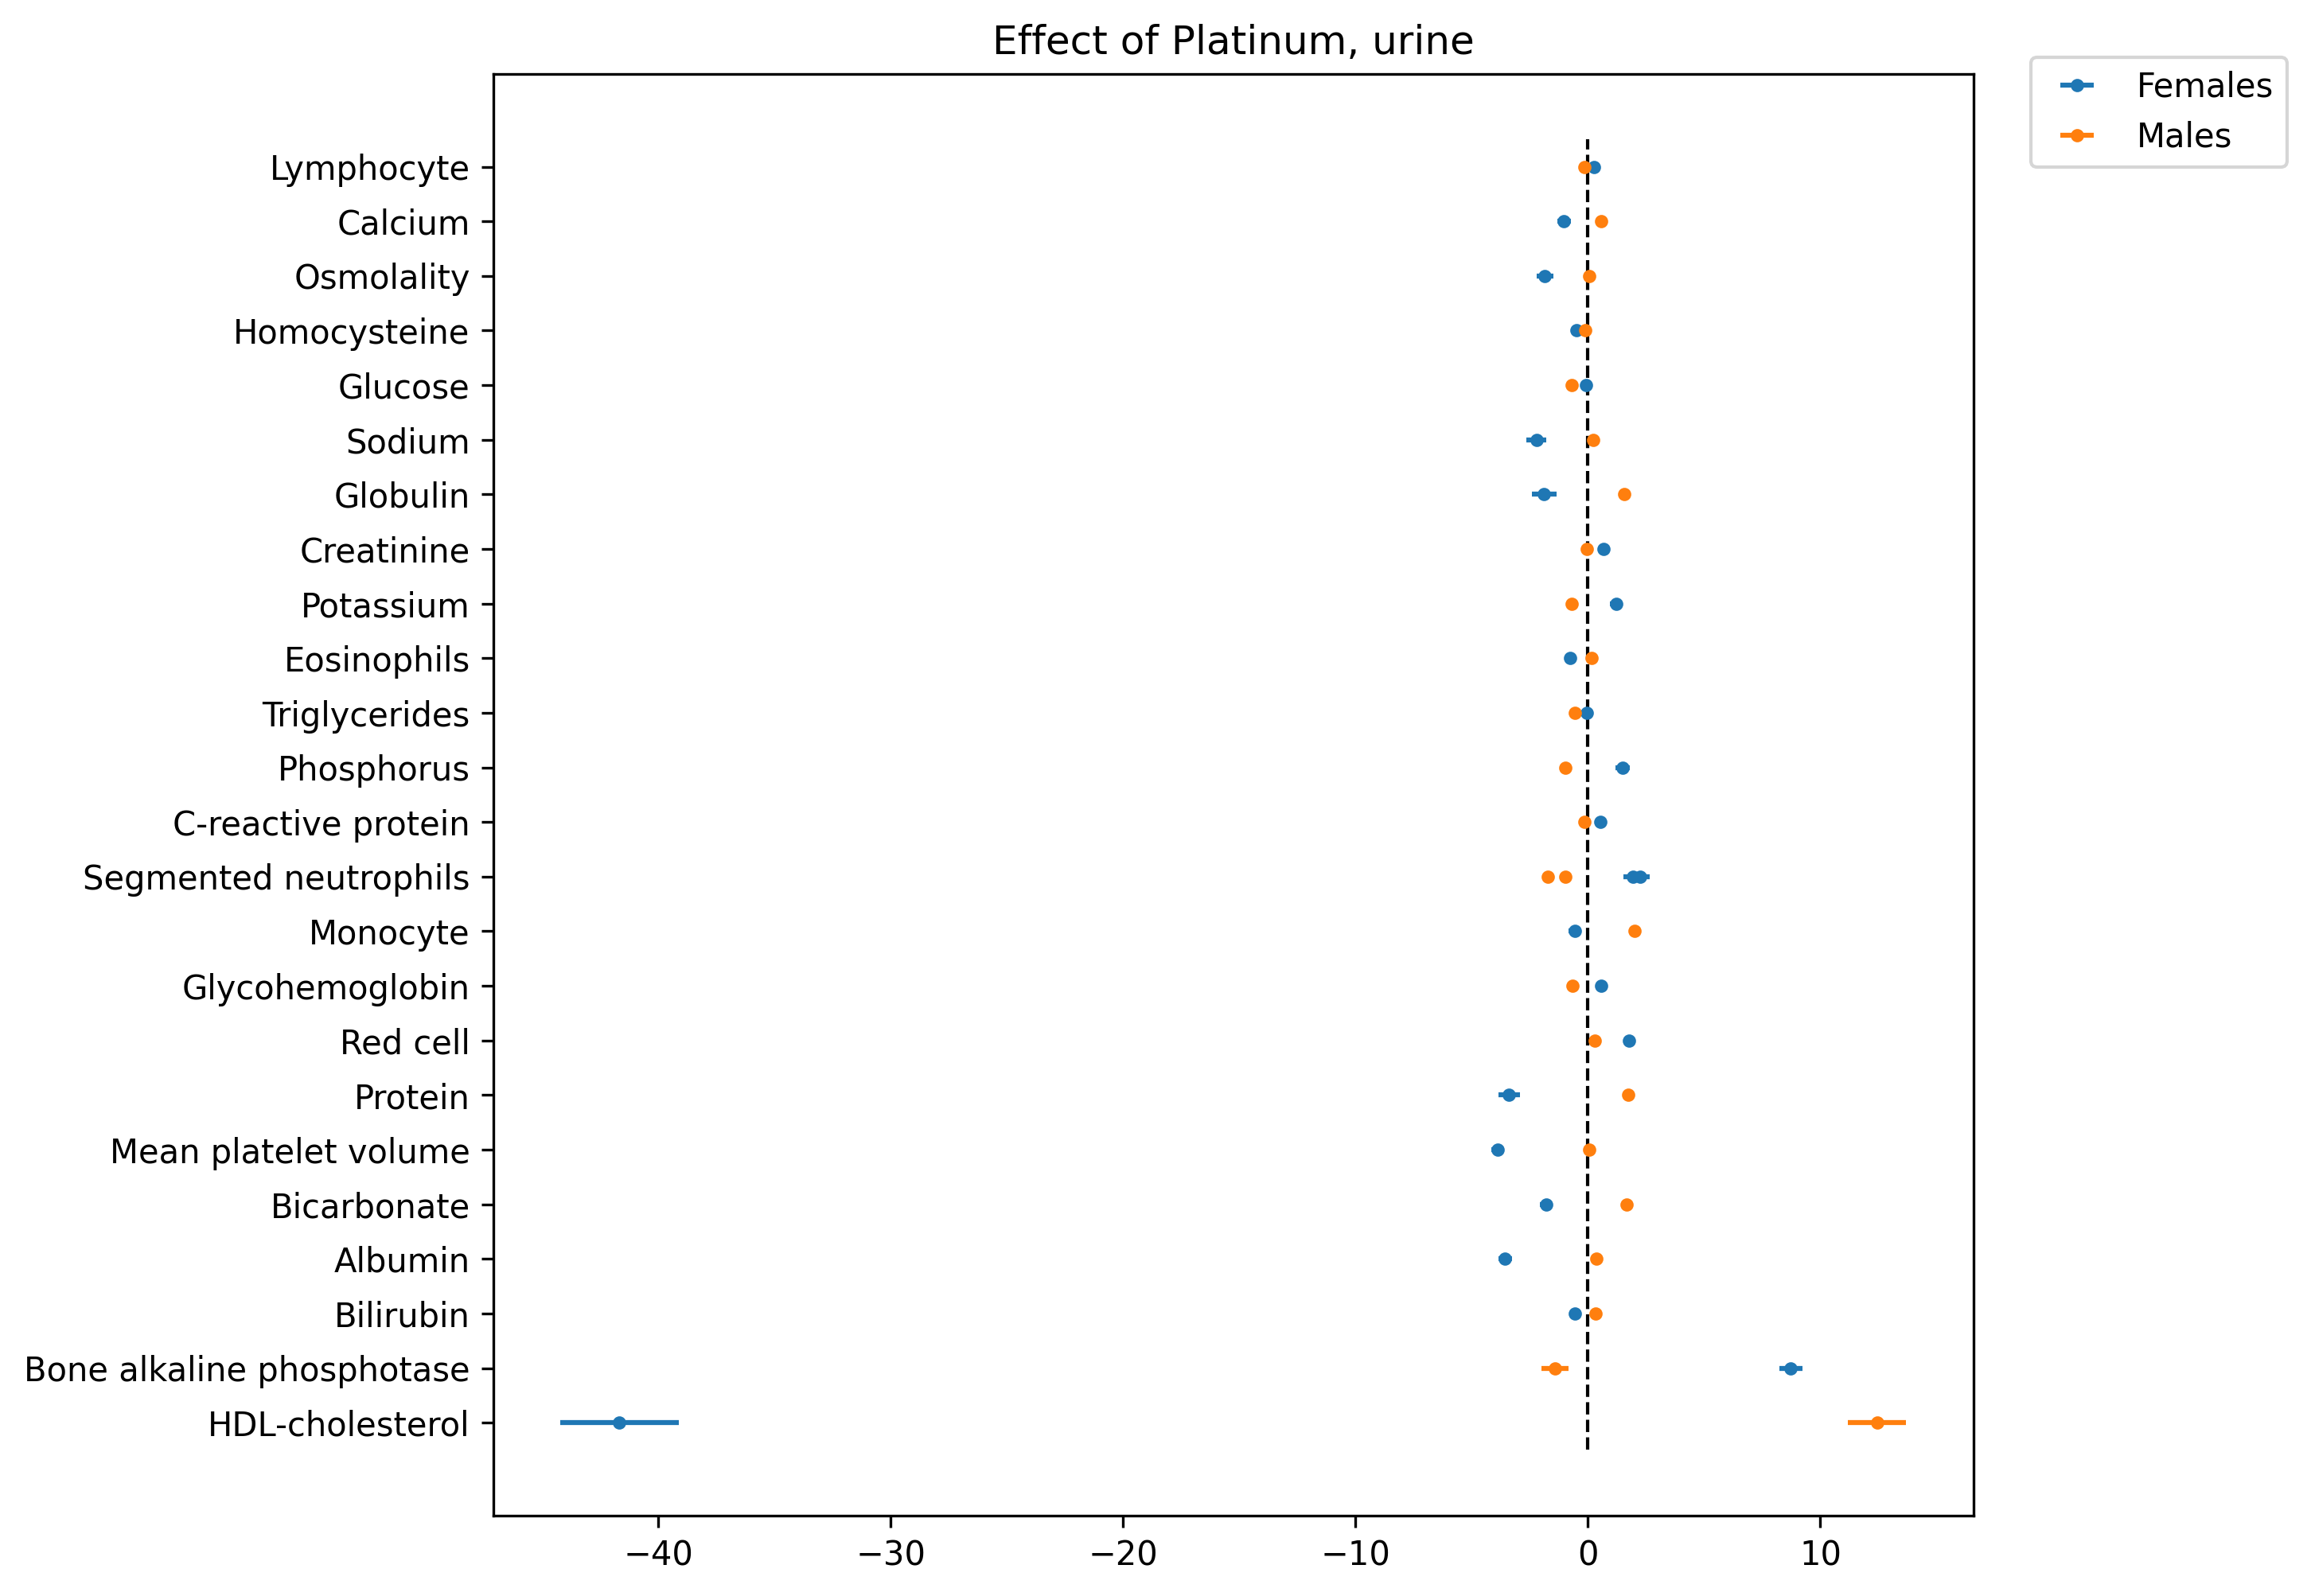

In [106]:
plot_betas(nhanes_res[sig], 'URXUPT', [-0.5, 23.5], 'Effect of Platinum, urine')

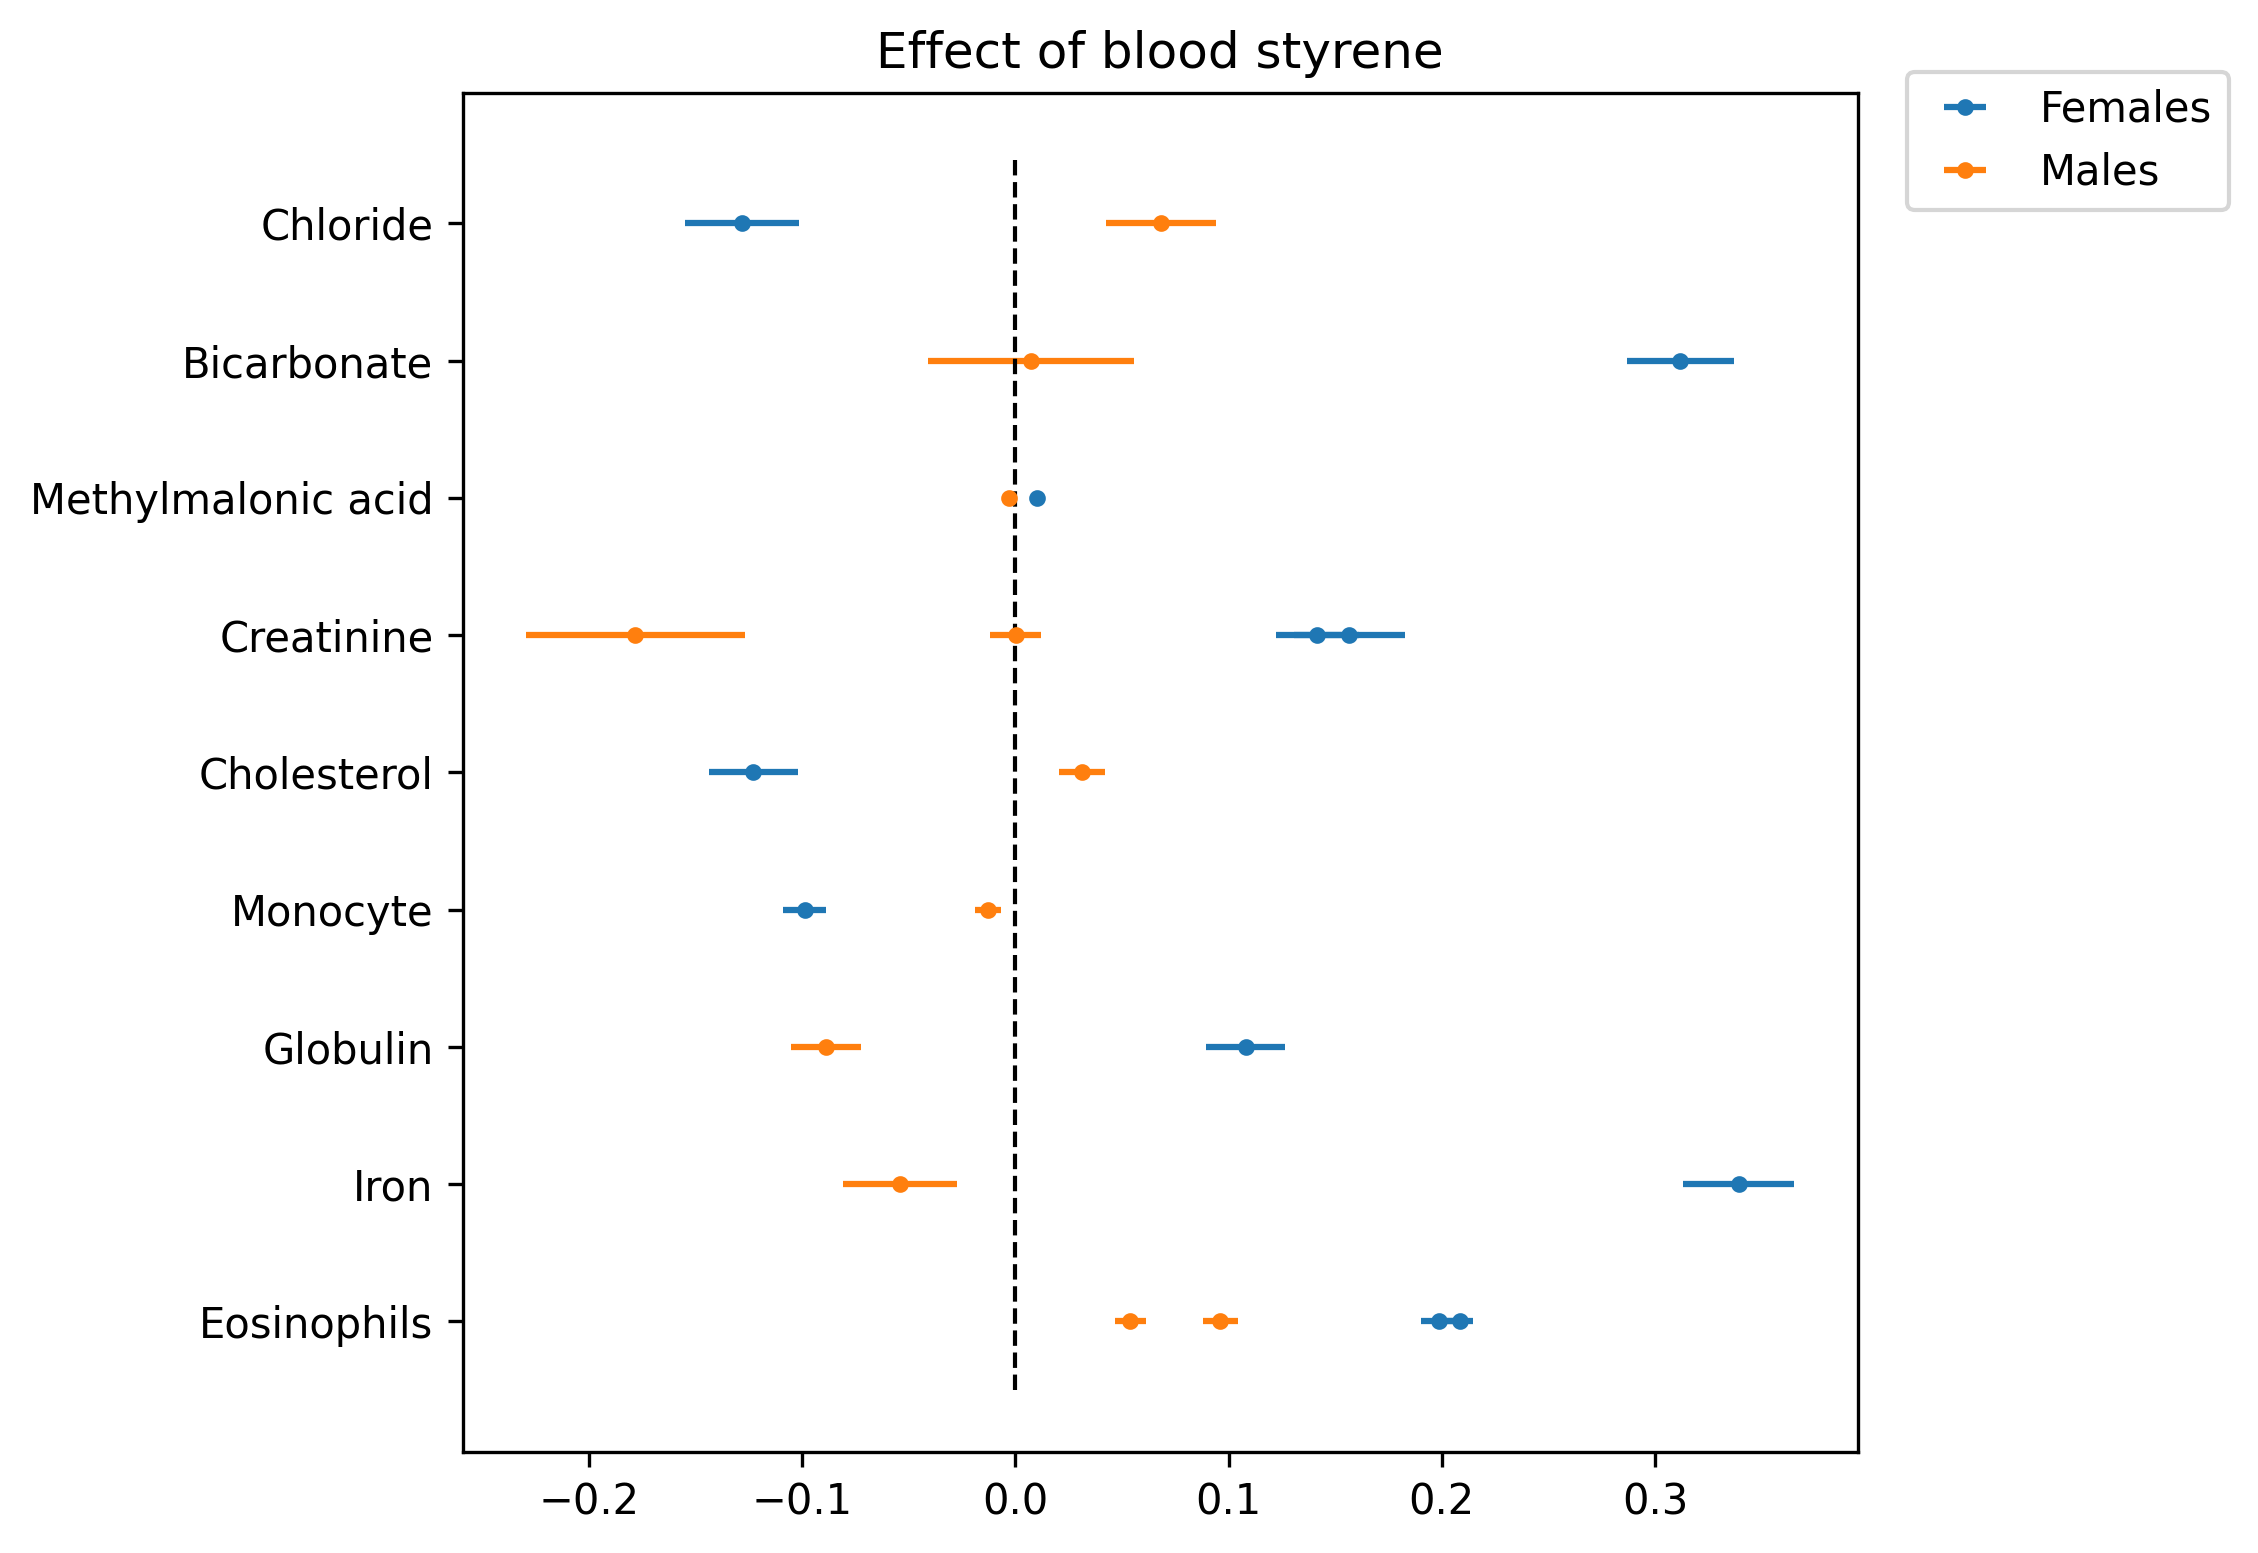

In [107]:
plot_betas(nhanes_res[sig], 'LBXVST', [-0.5, 8.5], 'Effect of blood styrene', figs=(6,6))

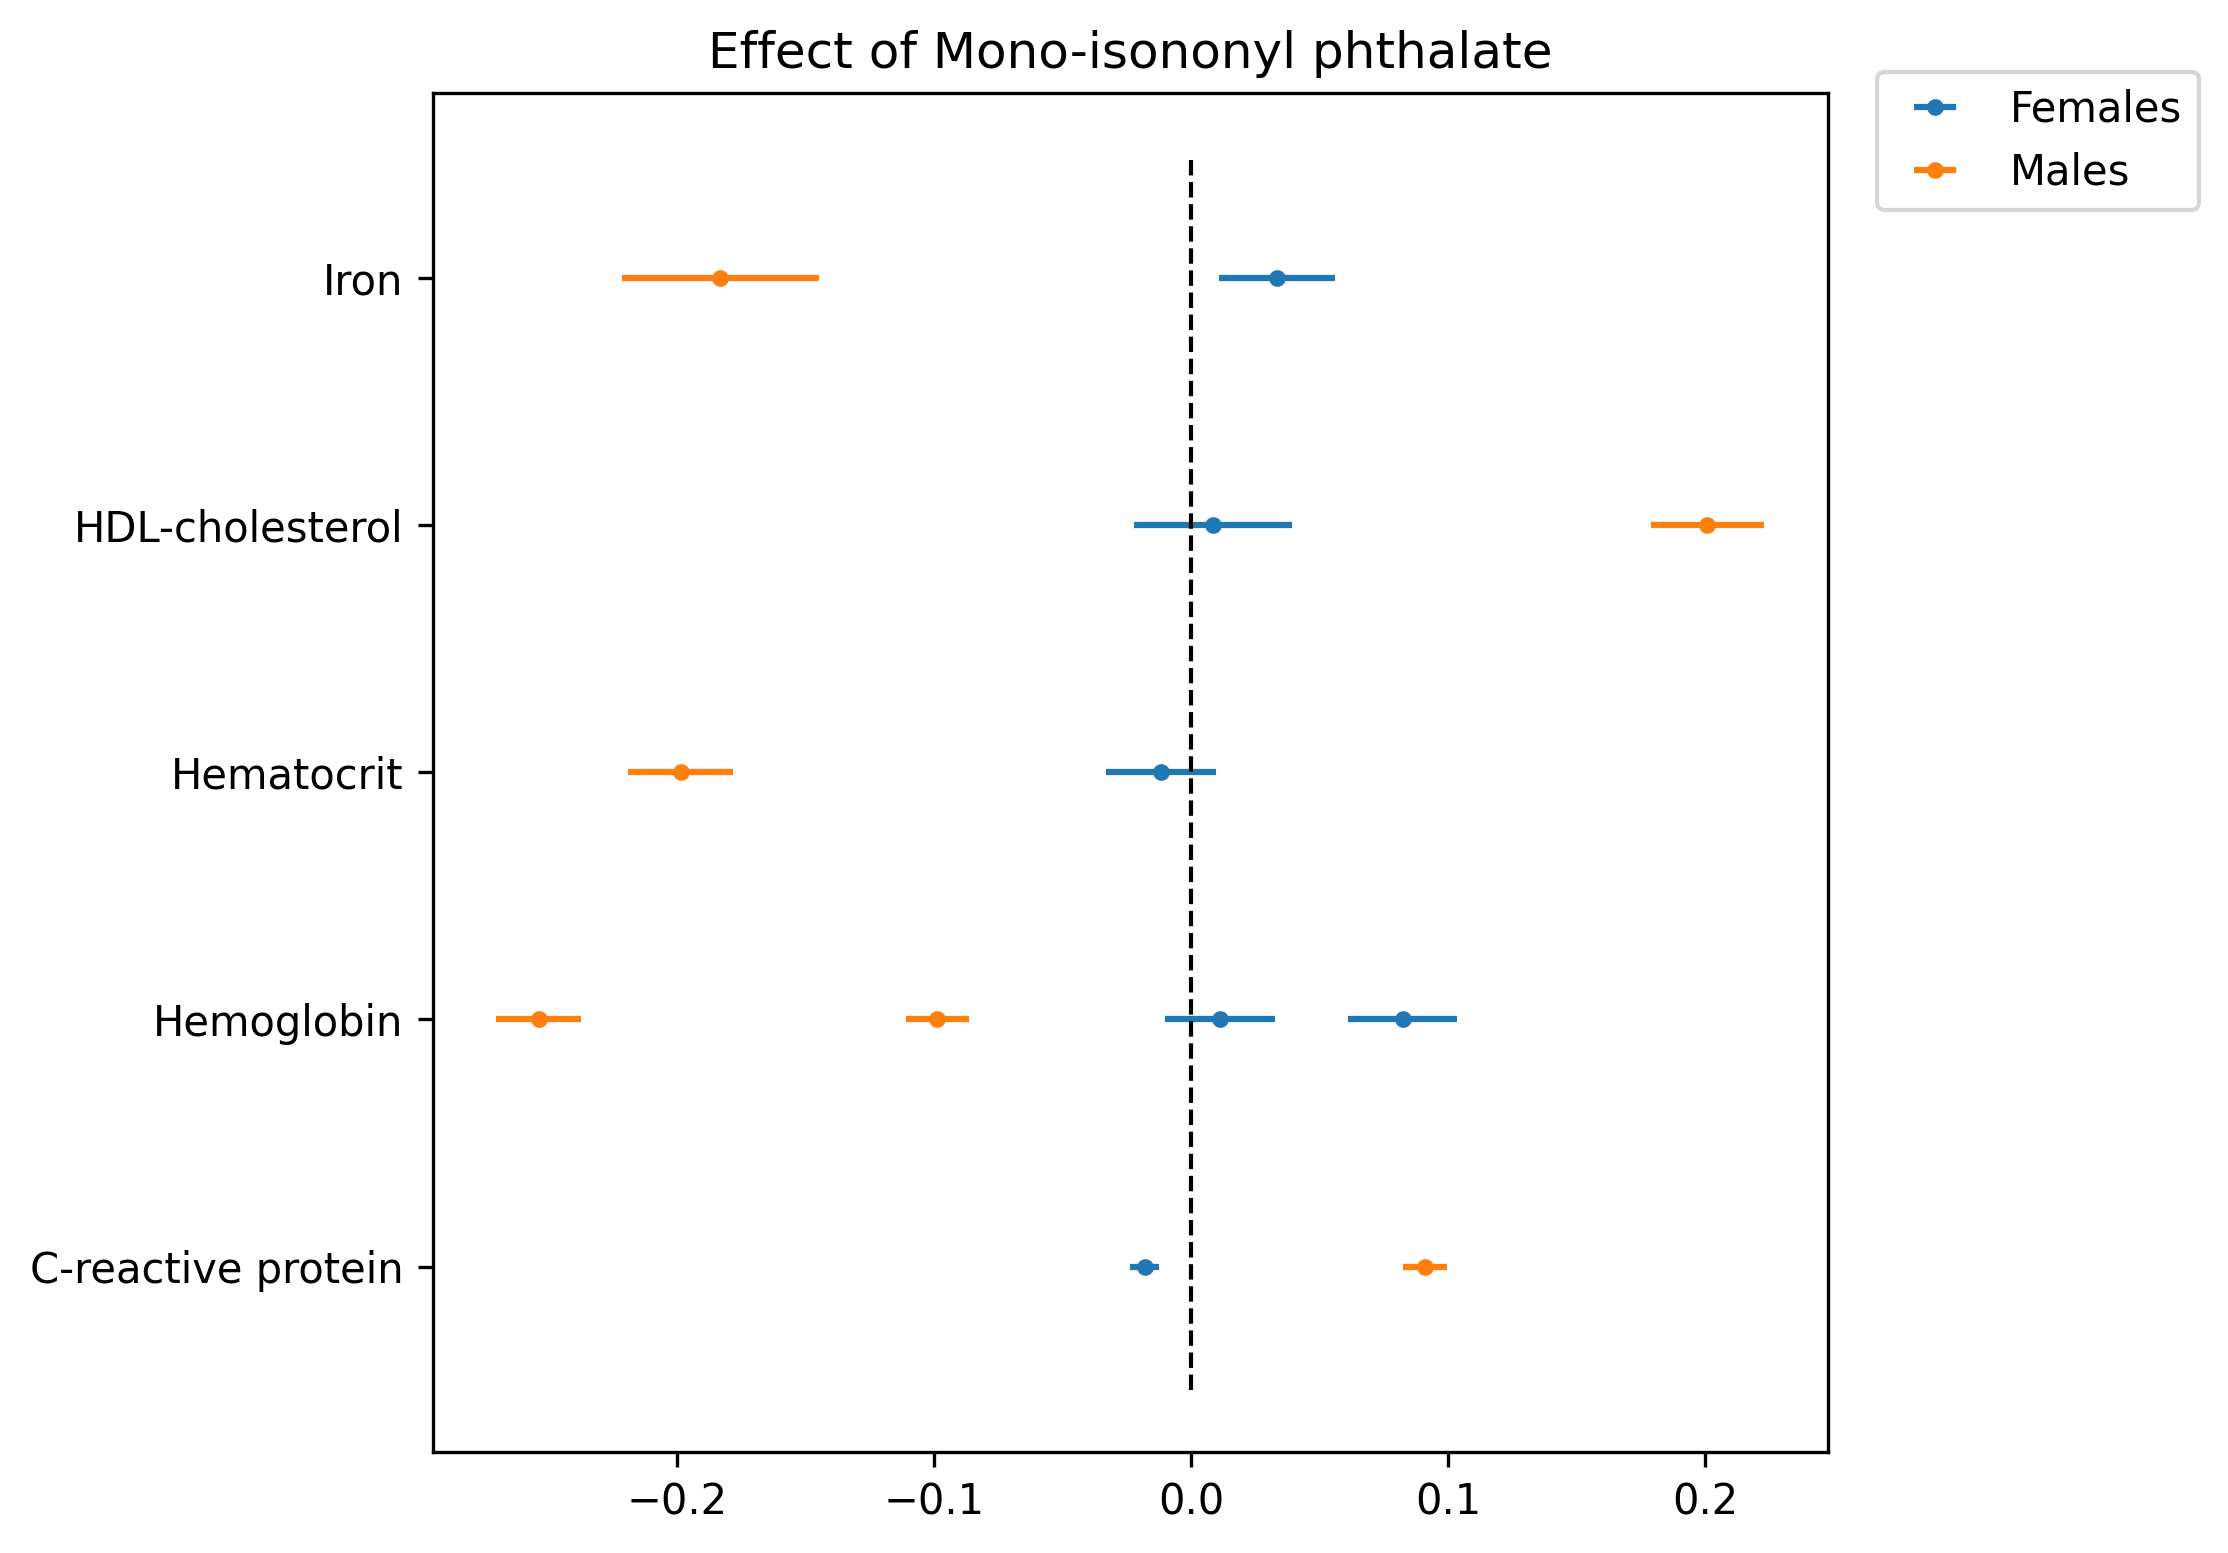

In [109]:
plot_betas(nhanes_res[sig], 'URXMNP', [-0.5, 4.5], 'Effect of Mono-isononyl phthalate', figs=(6,6) )

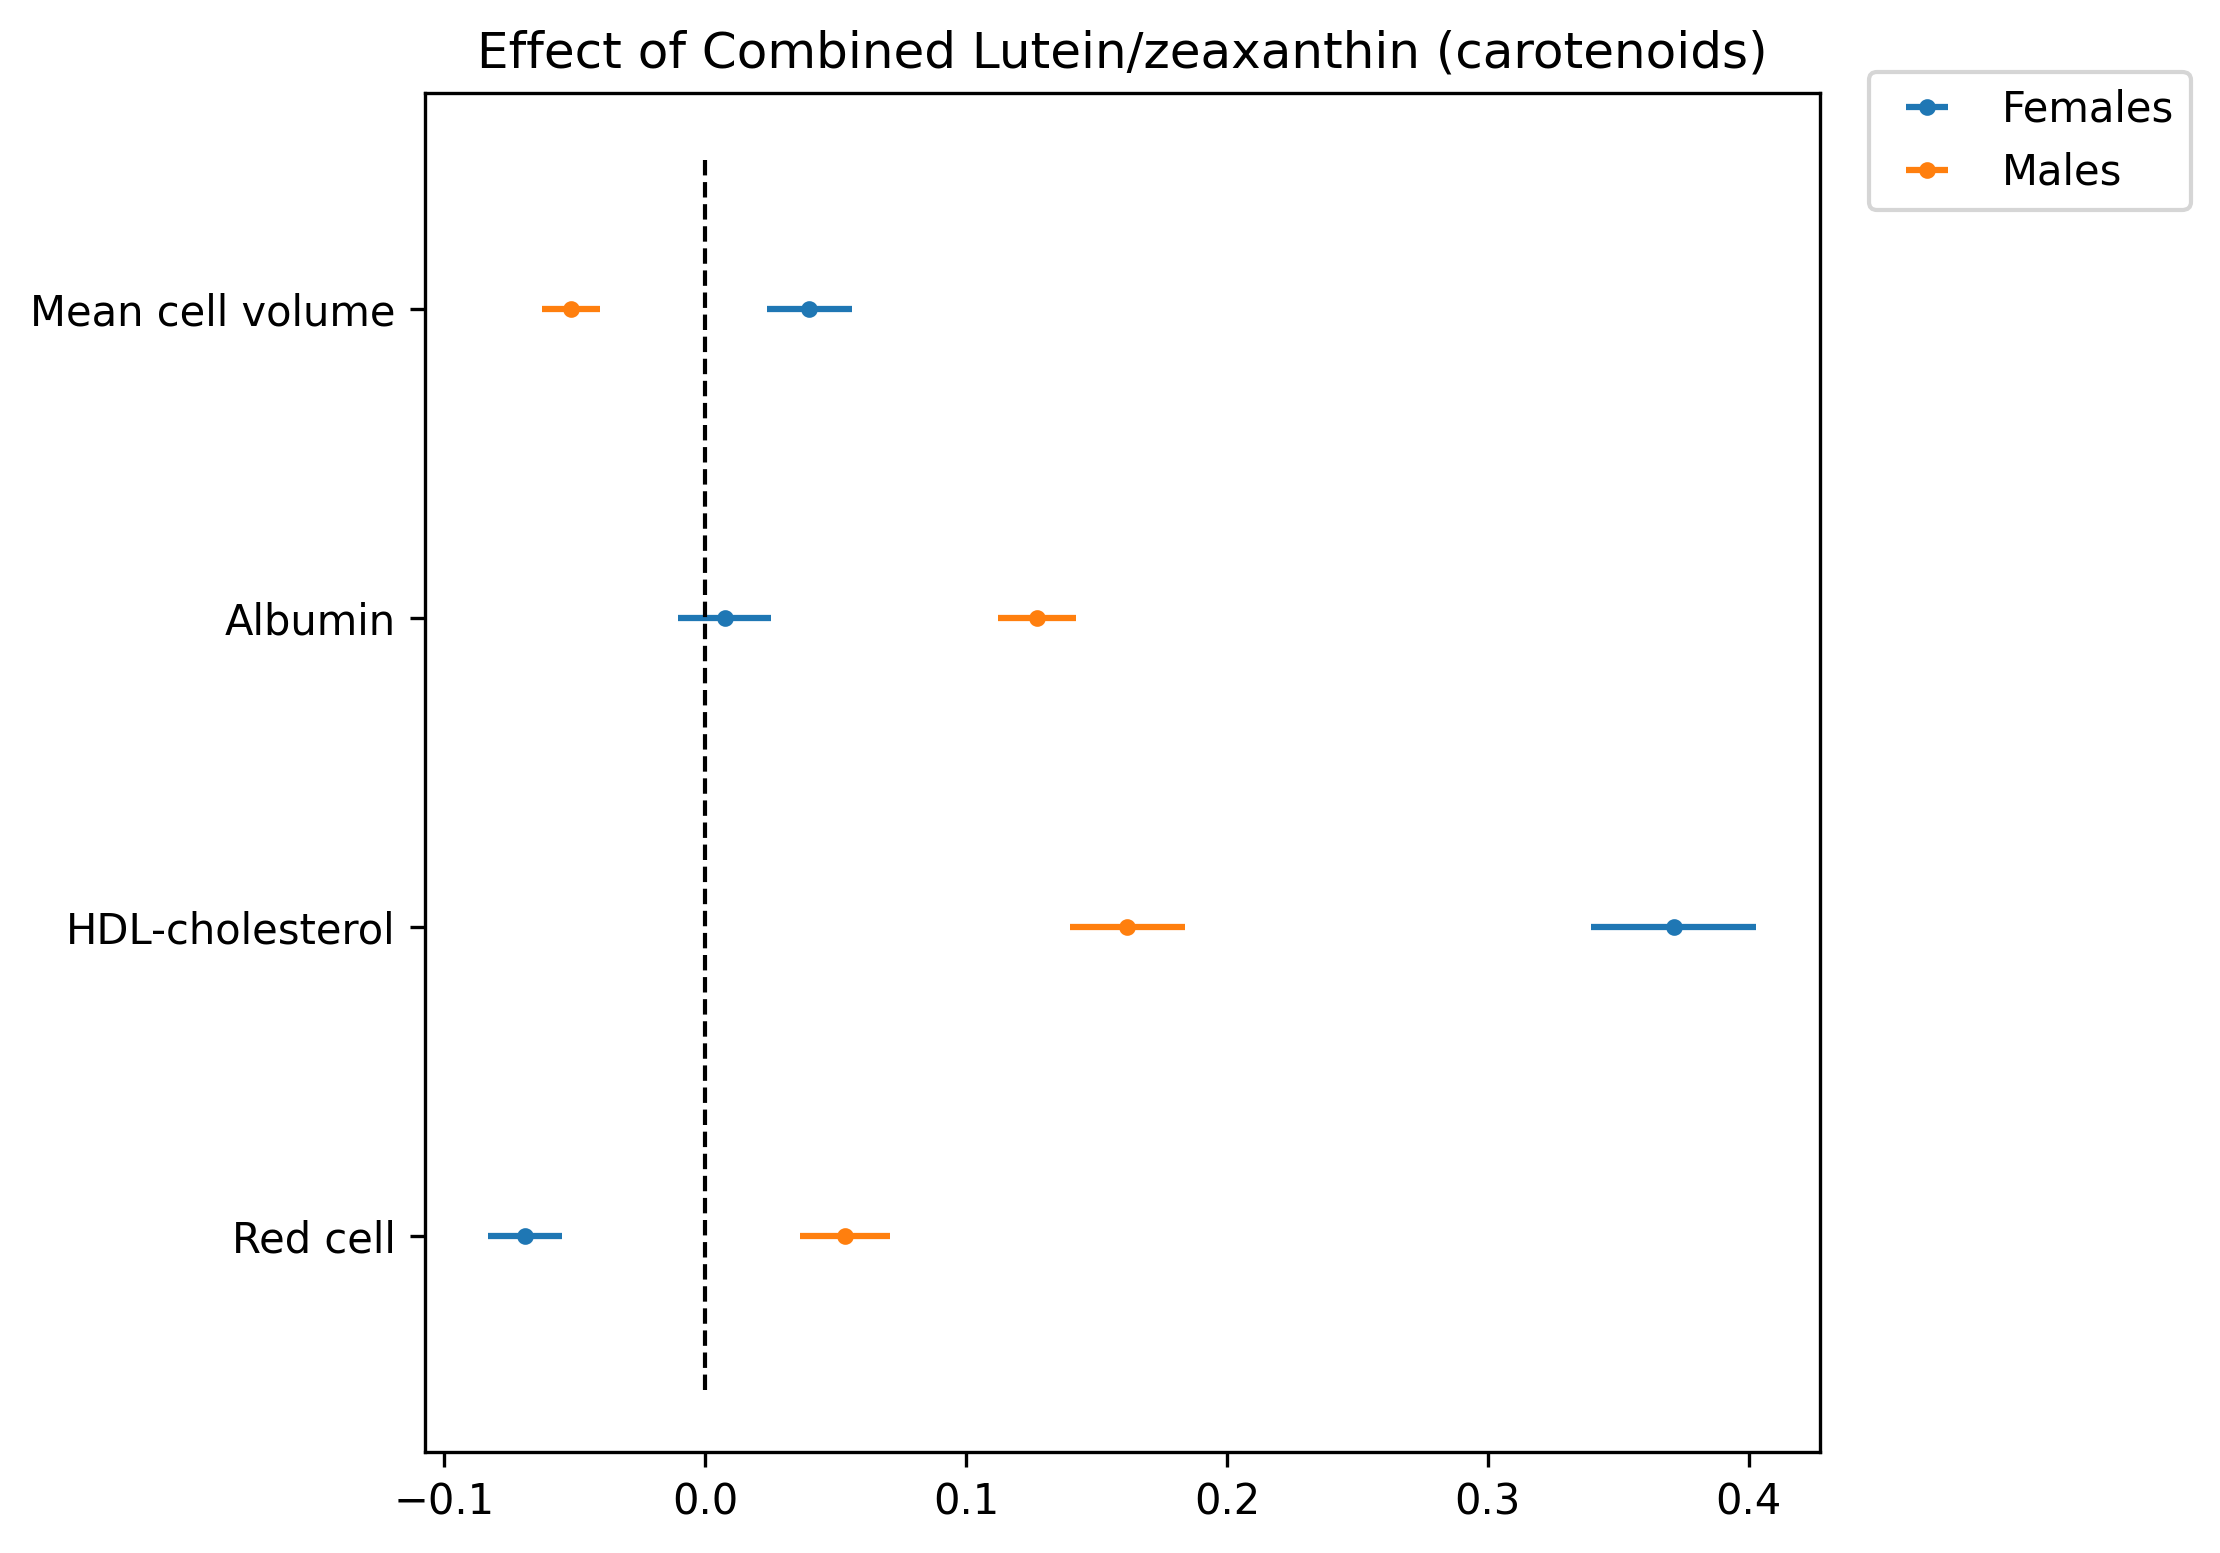

In [110]:
plot_betas(nhanes_res[sig], 'LBXLUZ', [-0.5, 3.5], 'Effect of Combined Lutein/zeaxanthin (carotenoids)', figs=(6,6))

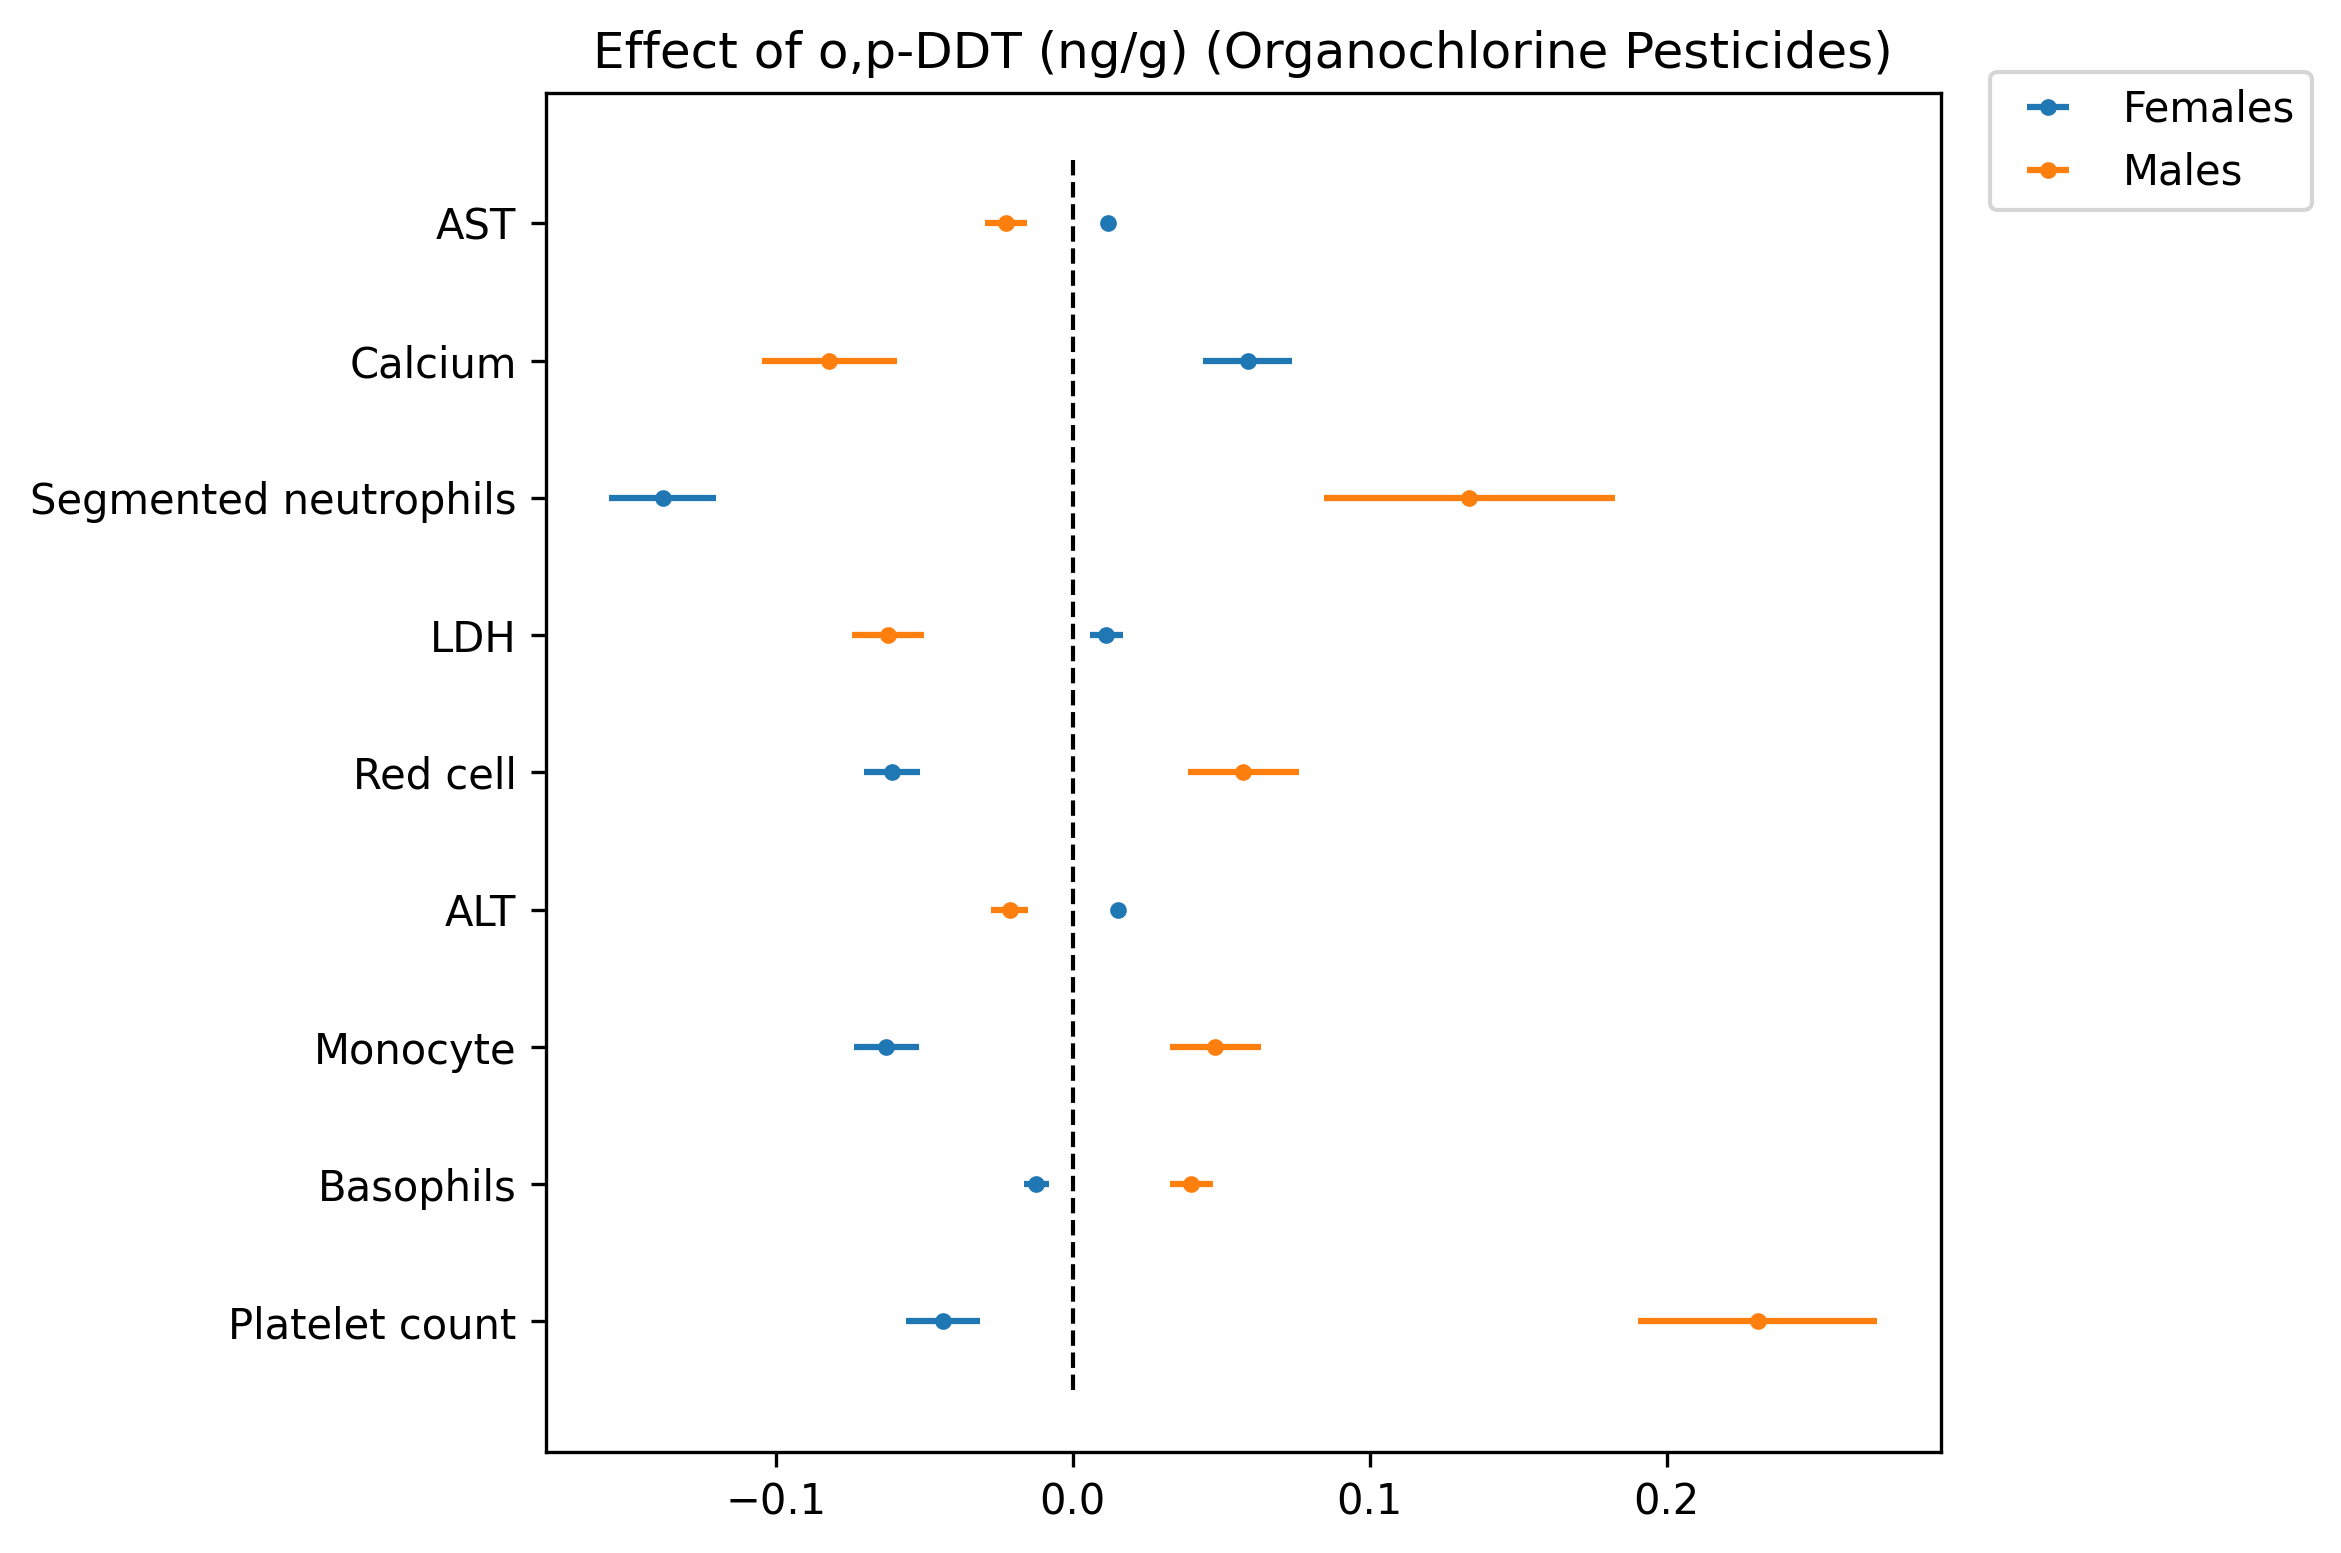

In [111]:
plot_betas(nhanes_res[sig], 'LBXODT', [-0.5, 8.5], 'Effect of o,p-DDT (ng/g) (Organochlorine Pesticides)', figs=(6,6))

## References

- Winkler, Thomas W., Anne E. Justice, L. Adrienne Cupples, Florian Kronenberg, Zoltán Kutalik, Iris M. Heid, and GIANT consortium. 2017. “Approaches to Detect Genetic Effects That Differ between Two Strata in Genome-Wide Meta-Analyses: Recommendations Based on a Systematic Evaluation.” PloS One 12 (7): e0181038. https://doi.org/10/gbqbnm.
